# Figures

In [1]:
import numpy as np
import itertools
from matplotlib import rc, rcParams
from matplotlib import pyplot as plt
from pathlib import Path

# create figures directory if it does not exist
Path("figures").mkdir(exist_ok=True, parents=True)

# Parameters for plots
fs = 38
rcParams.update({"font.size": fs})
rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
rc("text", usetex=True)


# Perturbed Uniform Distribution: Two-Sample Testing

In [2]:
# Parameters for plots
linewidth = 3.5
markersize = 12
ylabel_fontsize = 38
xlabel_fontsize = 38
title_fontsize = 38
legend_fontsize = 38
title_pad = 15
xlabel_pad = 15
ylabel_pad = 15

labels = (
    r"\textrm{dpMMD}",
    r"\textrm{Naive dpMMD}",
    r"\textrm{U-stat dpMMD}",
    r"\textrm{TOT MMD}",
    r"\textrm{SARRM MMD}",
    r"\textrm{TCS-ME}",
)

# https://gist.github.com/thriveth/8560036
colors = [
    "#e41a1c", # red
    "#f781bf", # pink
    "#ff7f00", # orange
    "#4daf4a", # green
    "#377eb8", # blue
    "#984ea3", # purple
    "#a65628", # brown
    "#999999", # grey
    "#dede00", # yellow
]

markers = [
    'o',
    'o',
    'o',
    's',
    '^',
    'd',
]

linestyles = [
    '-',
    '-.',
    '--',
    ':',
    ':',
    ':',
]

## Vary privacy

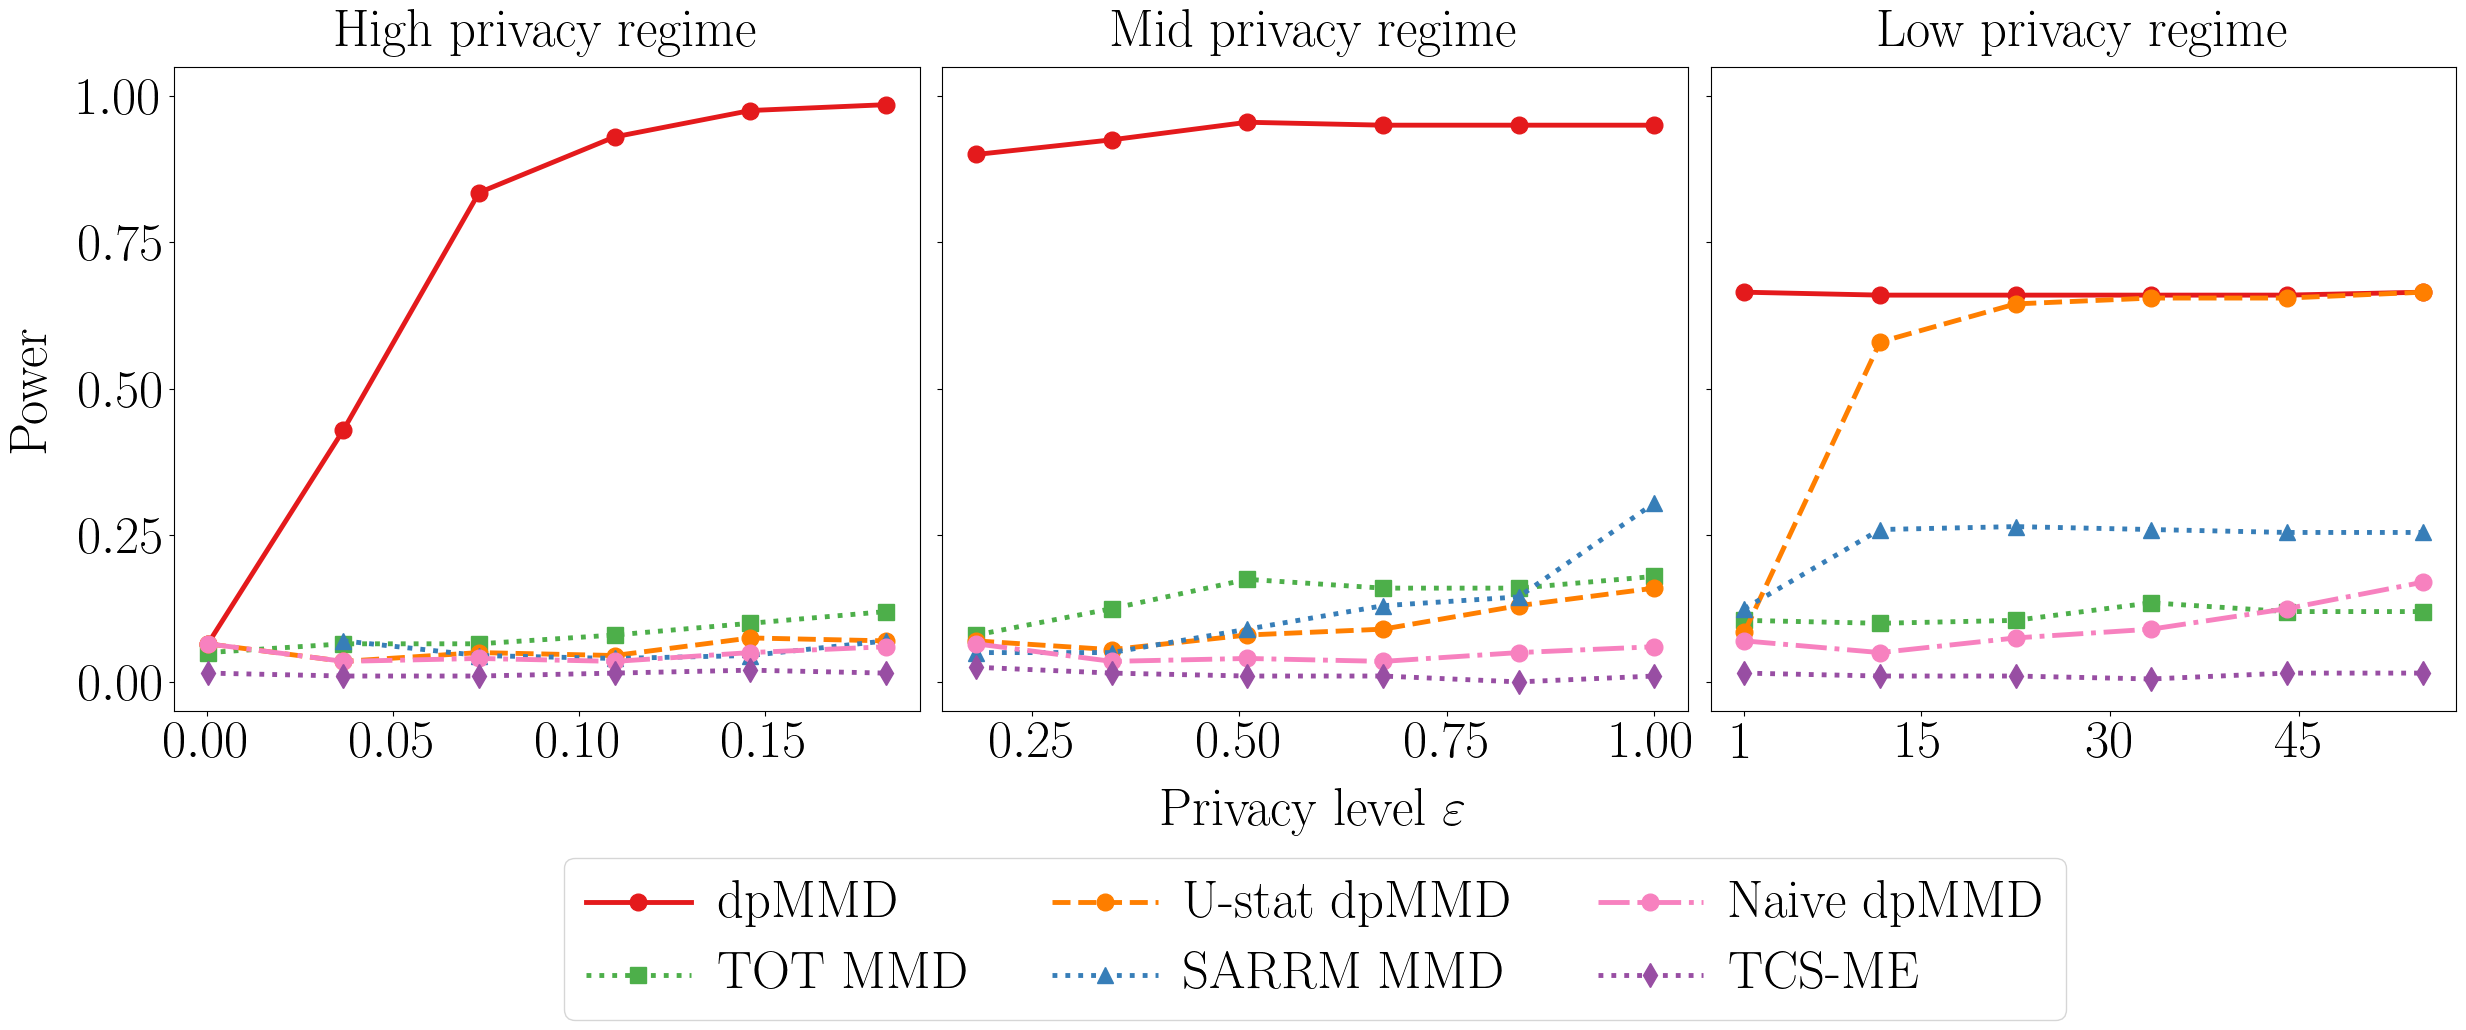

In [3]:
# load results
power_1 = np.load("results/uniform_mmd_power_vary_privacy_high.npy")
x_axis_1 = np.load("results/uniform_mmd_power_vary_privacy_high_x_axis.npy")

power_2 = np.load("results/uniform_mmd_power_vary_privacy_mid.npy")
x_axis_2 = np.load("results/uniform_mmd_power_vary_privacy_mid_x_axis.npy")

power_3 = np.load("results/uniform_mmd_power_vary_privacy_low.npy")
x_axis_3 = np.load("results/uniform_mmd_power_vary_privacy_low_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Power"
xlabels = (
    " ",
    r"Privacy level $\varepsilon$",
    "",
)

titles = (
    "High privacy regime",
    "Mid privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1, 5):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    # axs[i].set_xticks(x_axis[i])
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_xticks([0, 0.05, 0.1, 0.15])
axs[2].set_xticks([1, 15, 30, 45])
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_mmd_privacy.pdf", dpi=300, bbox_inches="tight")

## Vary sample size

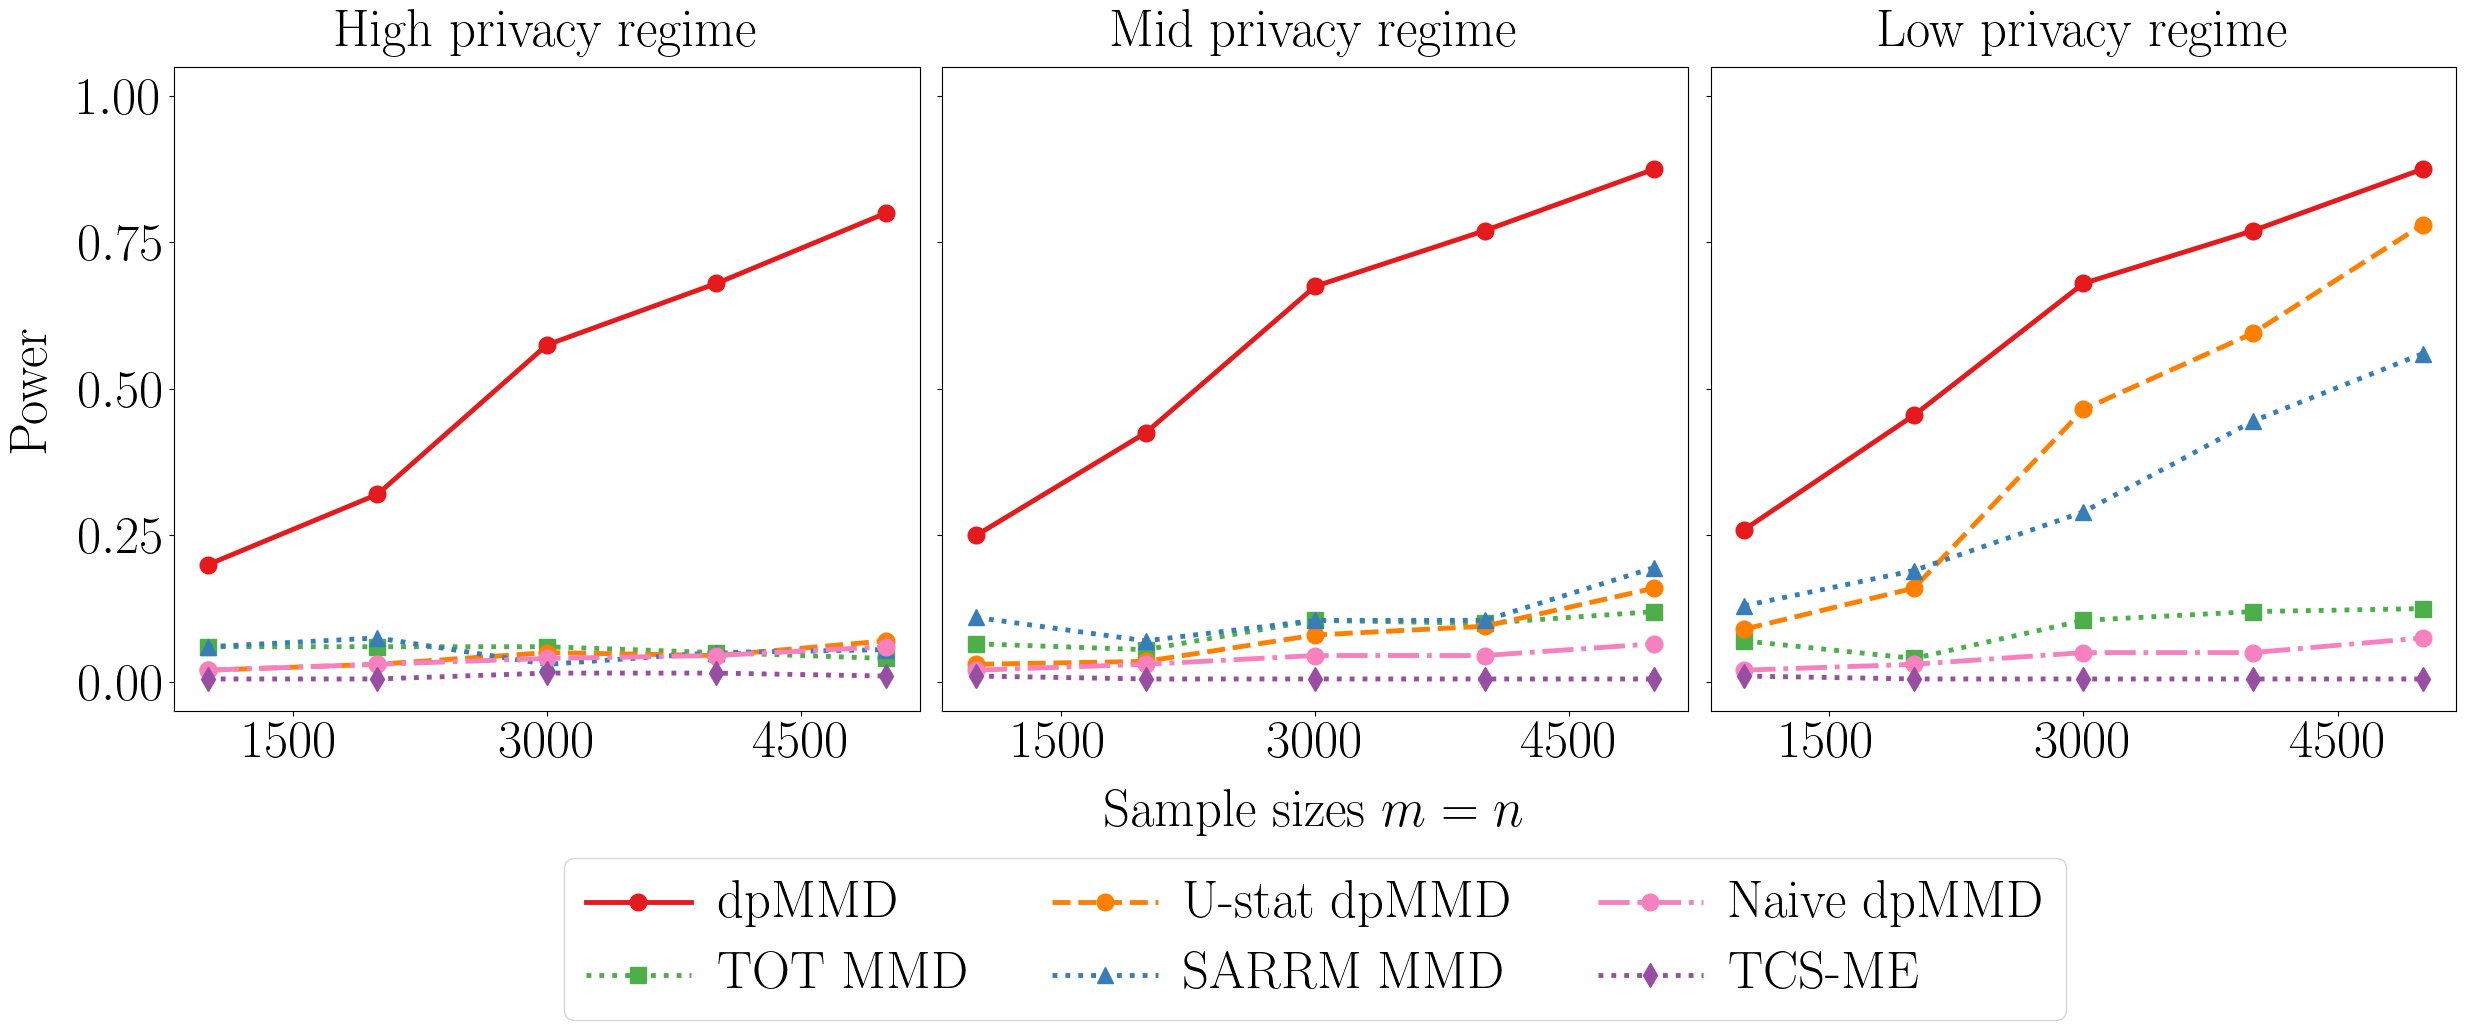

In [4]:
# load results
power_1 = np.load("results/uniform_mmd_power_vary_n_high.npy")
x_axis_1 = np.load("results/uniform_mmd_power_vary_n_high_x_axis.npy")

power_2 = np.load("results/uniform_mmd_power_vary_n_mid.npy")
x_axis_2 = np.load("results/uniform_mmd_power_vary_n_mid_x_axis.npy")

power_3 = np.load("results/uniform_mmd_power_vary_n_low.npy")
x_axis_3 = np.load("results/uniform_mmd_power_vary_n_low_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Power"
xlabels = (
    " ",
    r"Sample sizes $m=n$",
    "",
)

titles = (
    "High privacy regime",
    "Mid privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1, 5):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_xticks([1500, 3000, 4500,])
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_mmd_sample_size.pdf", dpi=300, bbox_inches="tight")

## Vary dimension

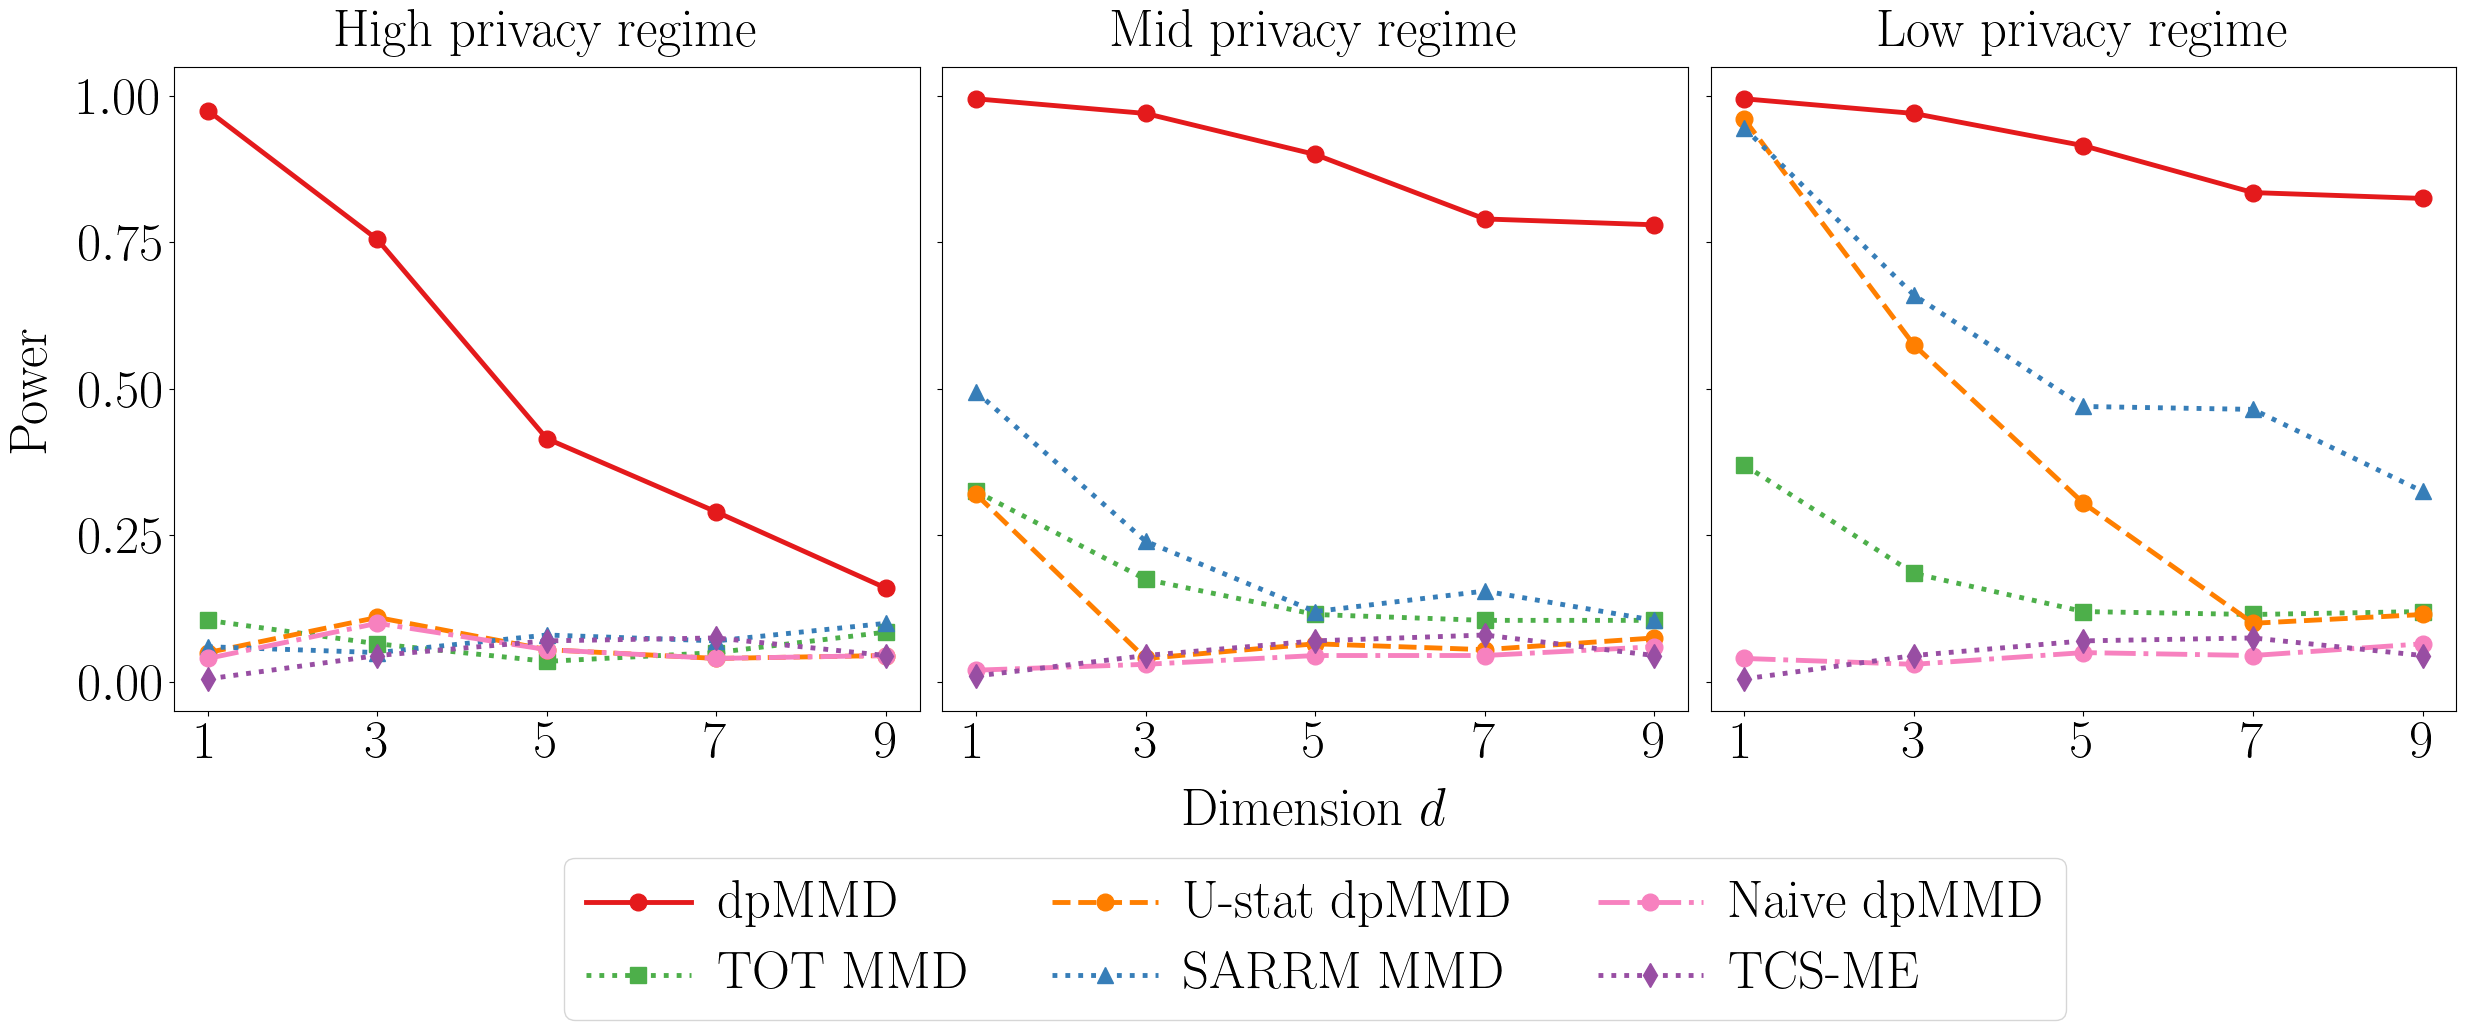

In [5]:
# load results
power_1 = np.load("results/uniform_mmd_power_vary_d_high.npy")
x_axis_1 = np.load("results/uniform_mmd_power_vary_d_high_x_axis.npy")

power_2 = np.load("results/uniform_mmd_power_vary_d_mid.npy")
x_axis_2 = np.load("results/uniform_mmd_power_vary_d_mid_x_axis.npy")

power_3 = np.load("results/uniform_mmd_power_vary_d_low.npy")
x_axis_3 = np.load("results/uniform_mmd_power_vary_d_low_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Power"
xlabels = (
    " ",
    r"Dimension $d$",
    "",
)

titles = (
    "High privacy regime",
    "Mid privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1, 5):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_xticks(x_axis[i])
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_mmd_dimension.pdf", dpi=300, bbox_inches="tight")

## Level

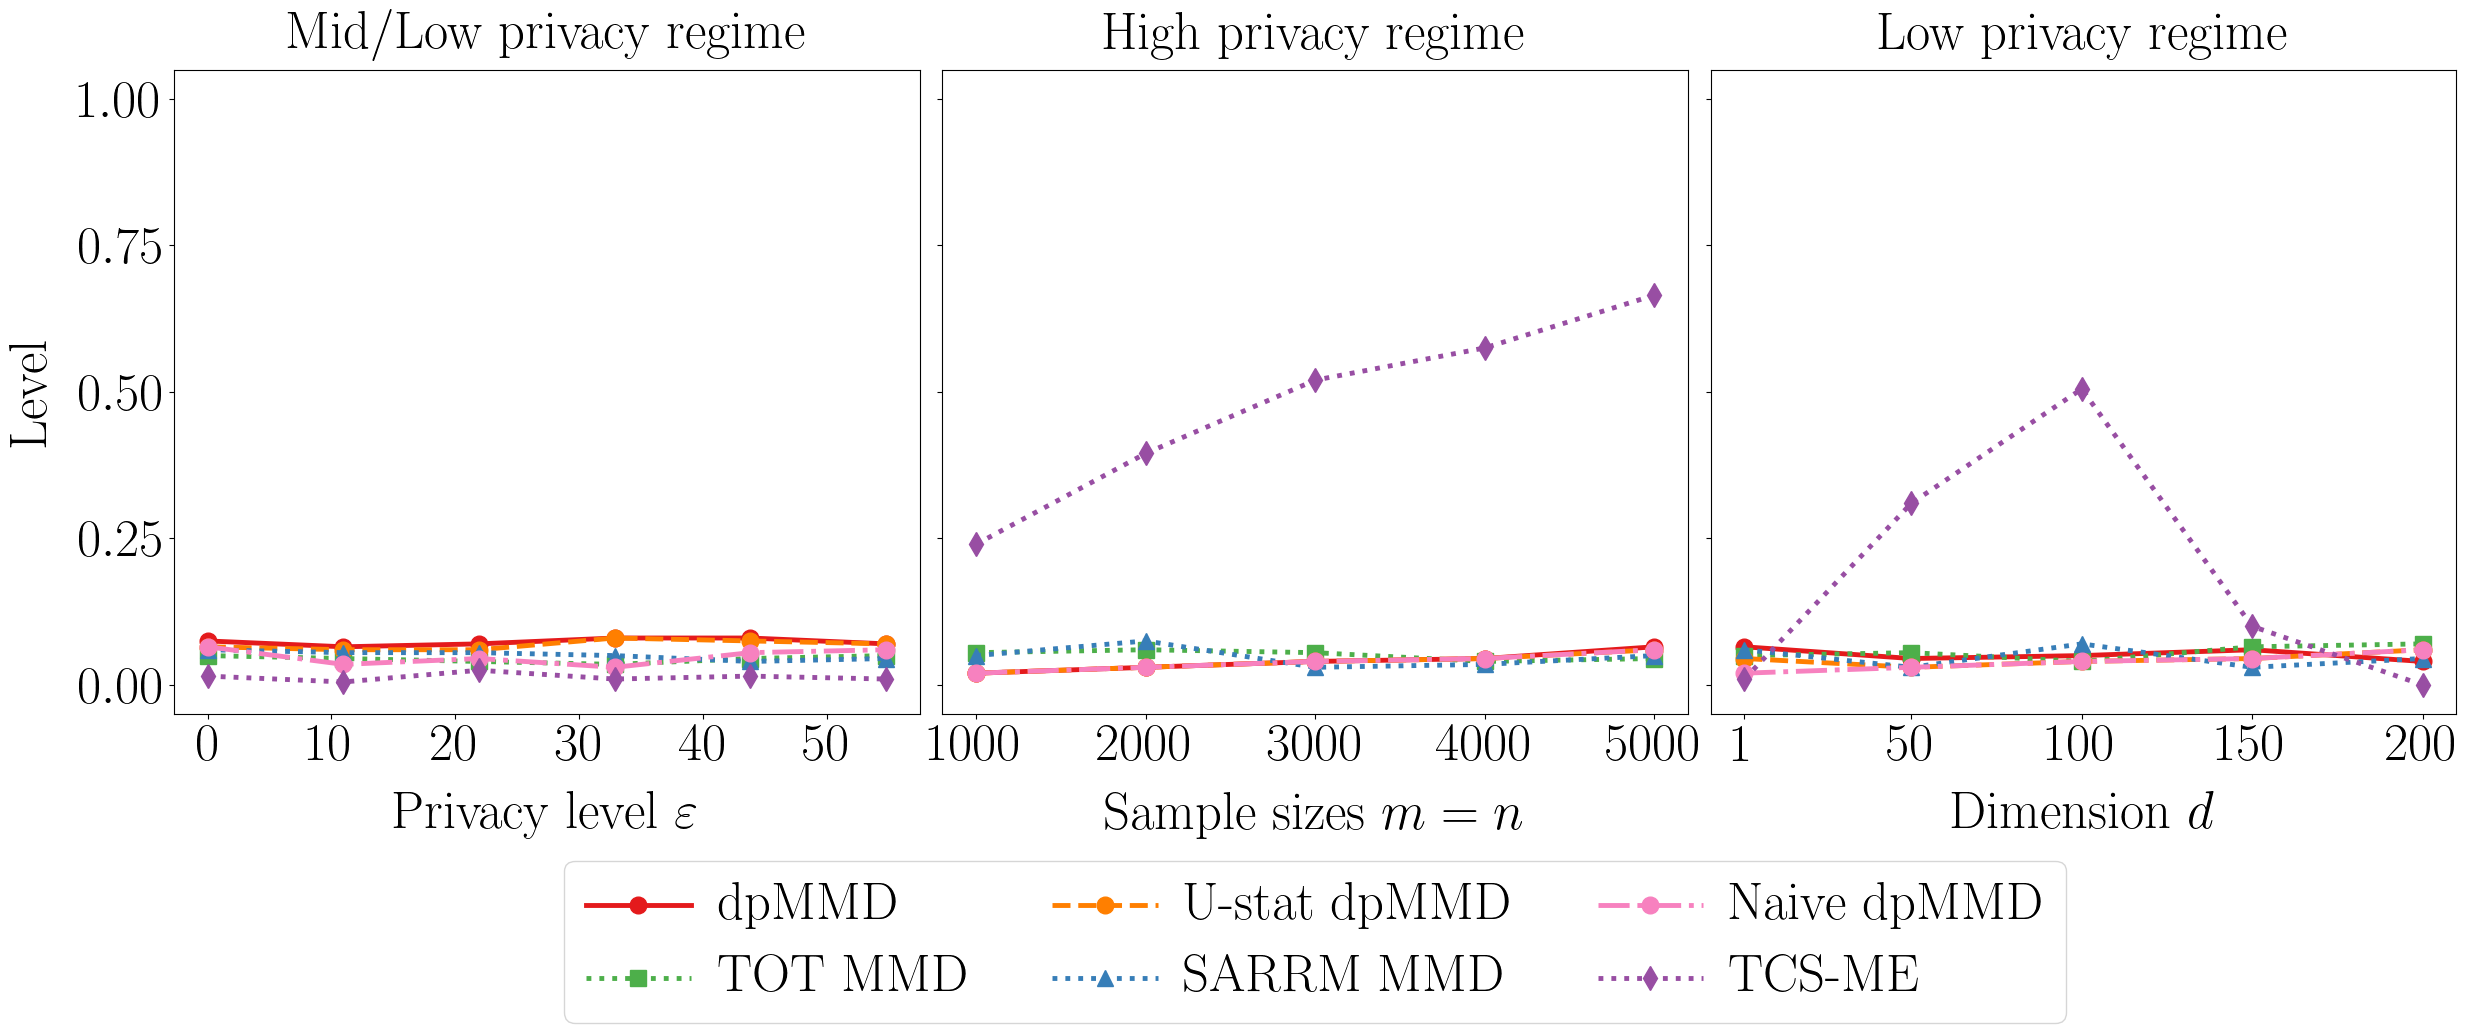

In [6]:
# load results
power_1 = np.load("results/uniform_mmd_level_vary_privacy.npy")
x_axis_1 = np.load("results/uniform_mmd_level_vary_privacy_x_axis.npy")

power_2 = np.load("results/uniform_mmd_level_vary_n.npy")
x_axis_2 = np.load("results/uniform_mmd_level_vary_n_x_axis.npy")

power_3 = np.load("results/uniform_mmd_level_vary_d.npy")
x_axis_3 = np.load("results/uniform_mmd_level_vary_d_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Level"
xlabels = (
    r"Privacy level $\varepsilon$",
    r"Sample sizes $m=n$",
    r"Dimension $d$",
)

titles = (
    "Mid/Low privacy regime ",
    "High privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1, 5):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_xticks([0, 10, 20, 30, 40, 50])
axs[1].set_xticks(x_axis[1])
axs[2].set_xticks(x_axis[2])
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_mmd_level.pdf", dpi=300, bbox_inches="tight")

## Appendix

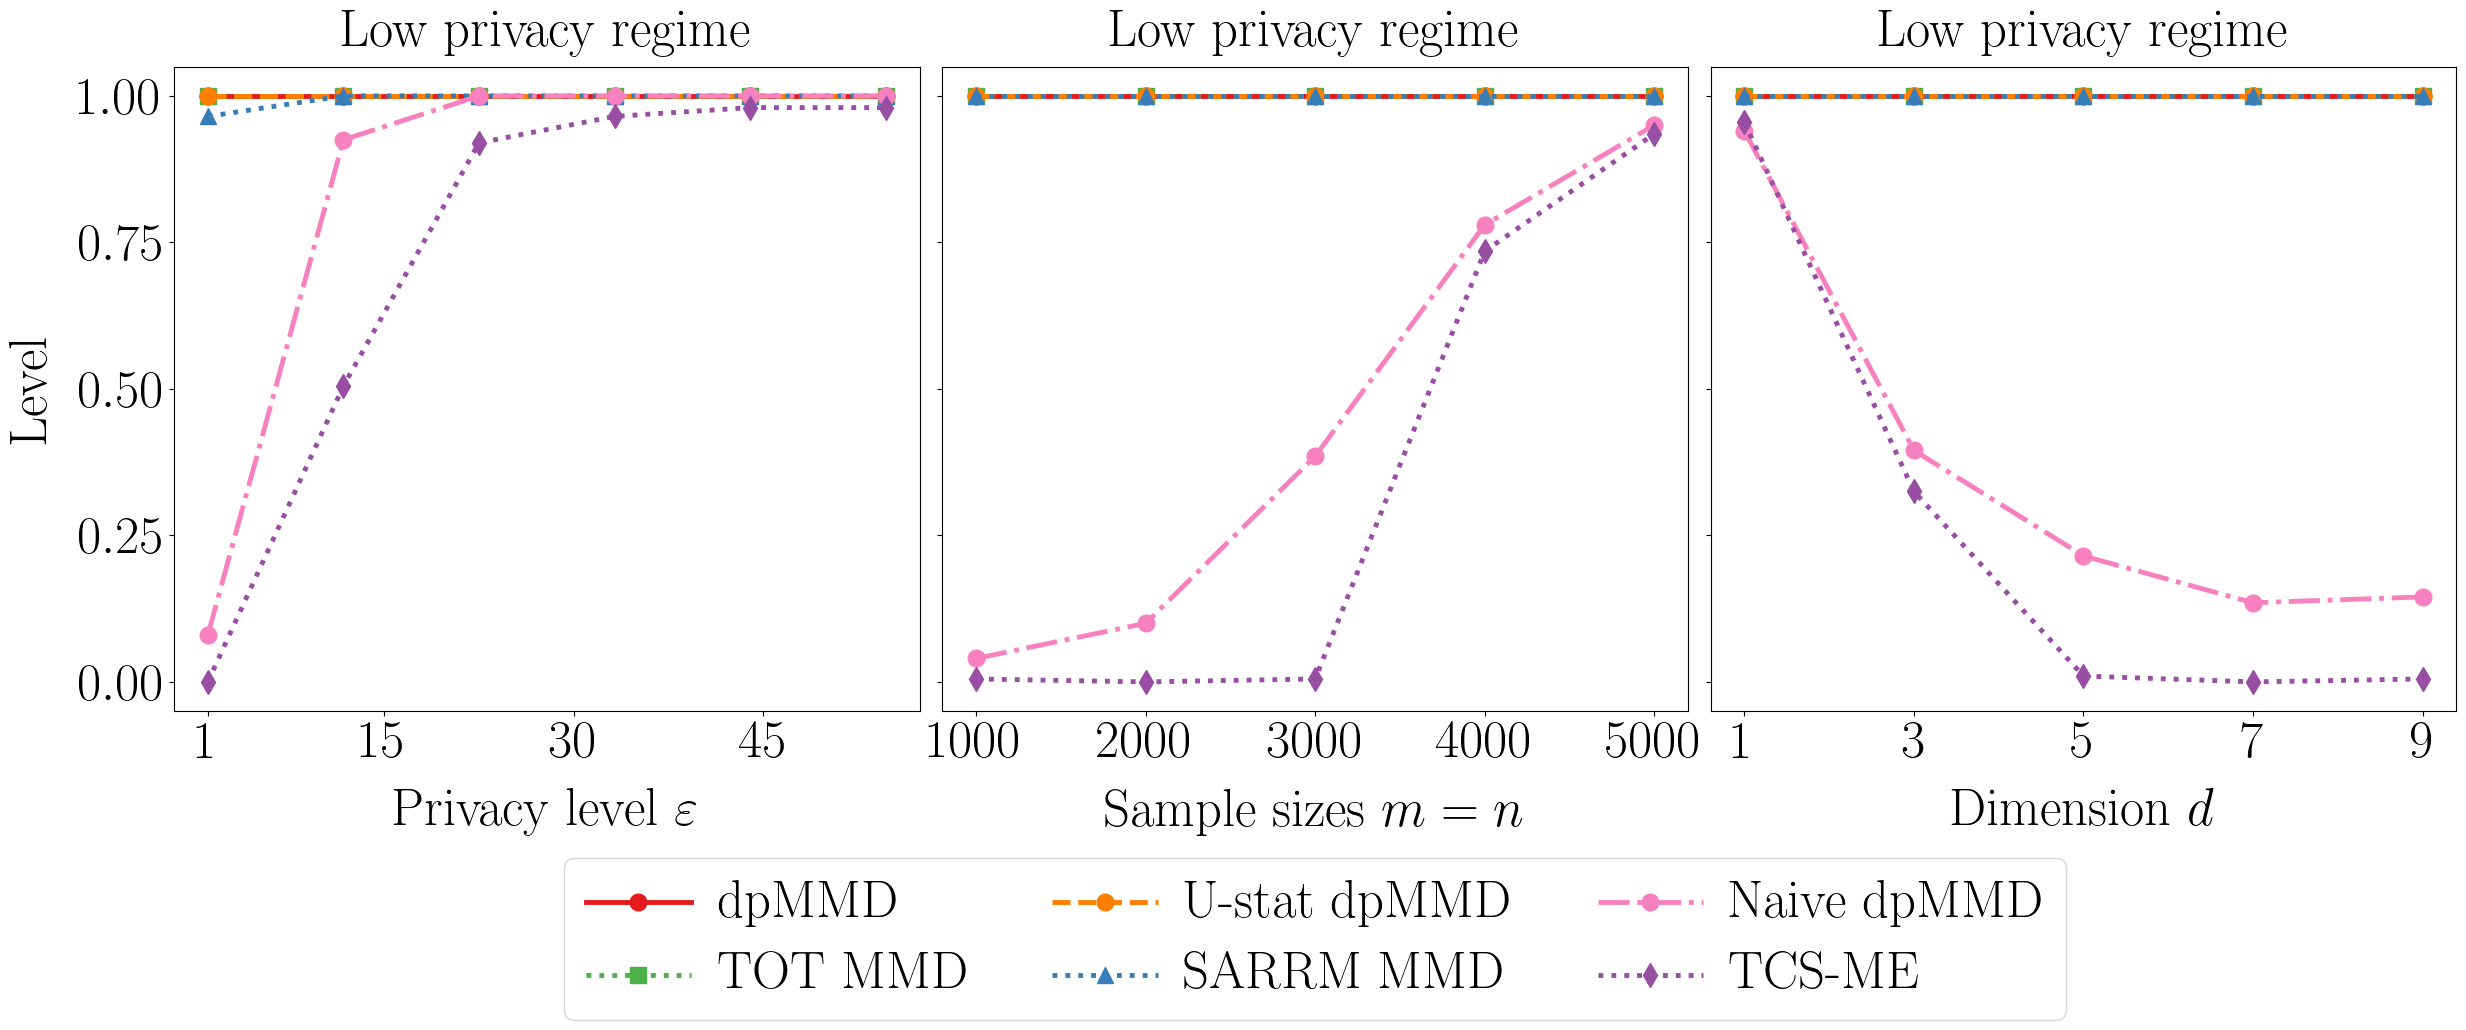

In [7]:
# load results
power_1 = np.load("results/uniform_mmd_power_vary_privacy_appendix.npy")
x_axis_1 = np.load("results/uniform_mmd_power_vary_privacy_appendix_x_axis.npy")

power_2 = np.load("results/uniform_mmd_power_vary_n_appendix.npy")
x_axis_2 = np.load("results/uniform_mmd_power_vary_n_appendix_x_axis.npy")

power_3 = np.load("results/uniform_mmd_power_vary_d_appendix.npy")
x_axis_3 = np.load("results/uniform_mmd_power_vary_d_appendix_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Level"
xlabels = (
    r"Privacy level $\varepsilon$",
    r"Sample sizes $m=n$",
    r"Dimension $d$",
)

titles = (
    "Low privacy regime",
    "Low privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1, 5):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_xticks([1, 15, 30, 45])
axs[1].set_xticks(x_axis[1])
axs[2].set_xticks(x_axis[2])
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_mmd_appendix.pdf", dpi=300, bbox_inches="tight")

# Perturbed Uniform Distribution: Independence Testing

In [8]:
# Parameters for plots
linewidth = 3.5
markersize = 12
ylabel_fontsize = 38
xlabel_fontsize = 38
title_fontsize = 38
legend_fontsize = 38
title_pad = 15
xlabel_pad = 15
ylabel_pad = 15

labels = (
    r"\textrm{dpHSIC}",
    r"\textrm{Naive dpHSIC}",
    r"\textrm{U-stat dpHSIC}",
    r"\textrm{TOT HSIC}",
    r"\textrm{SARRM HSIC}",
)

# https://gist.github.com/thriveth/8560036
colors = [
    "#e41a1c", # red
    "#f781bf", # pink
    "#ff7f00", # orange
    "#4daf4a", # green
    "#377eb8", # blue
    "#984ea3", # purple
    "#a65628", # brown
    "#999999", # grey
    "#dede00", # yellow
]

markers = [
    'o',
    'o',
    'o',
    's',
    '^',
    'd',
]

linestyles = [
    '-',
    '-.',
    '--',
    ':',
    ':',
    ':',
]

## Vary privacy

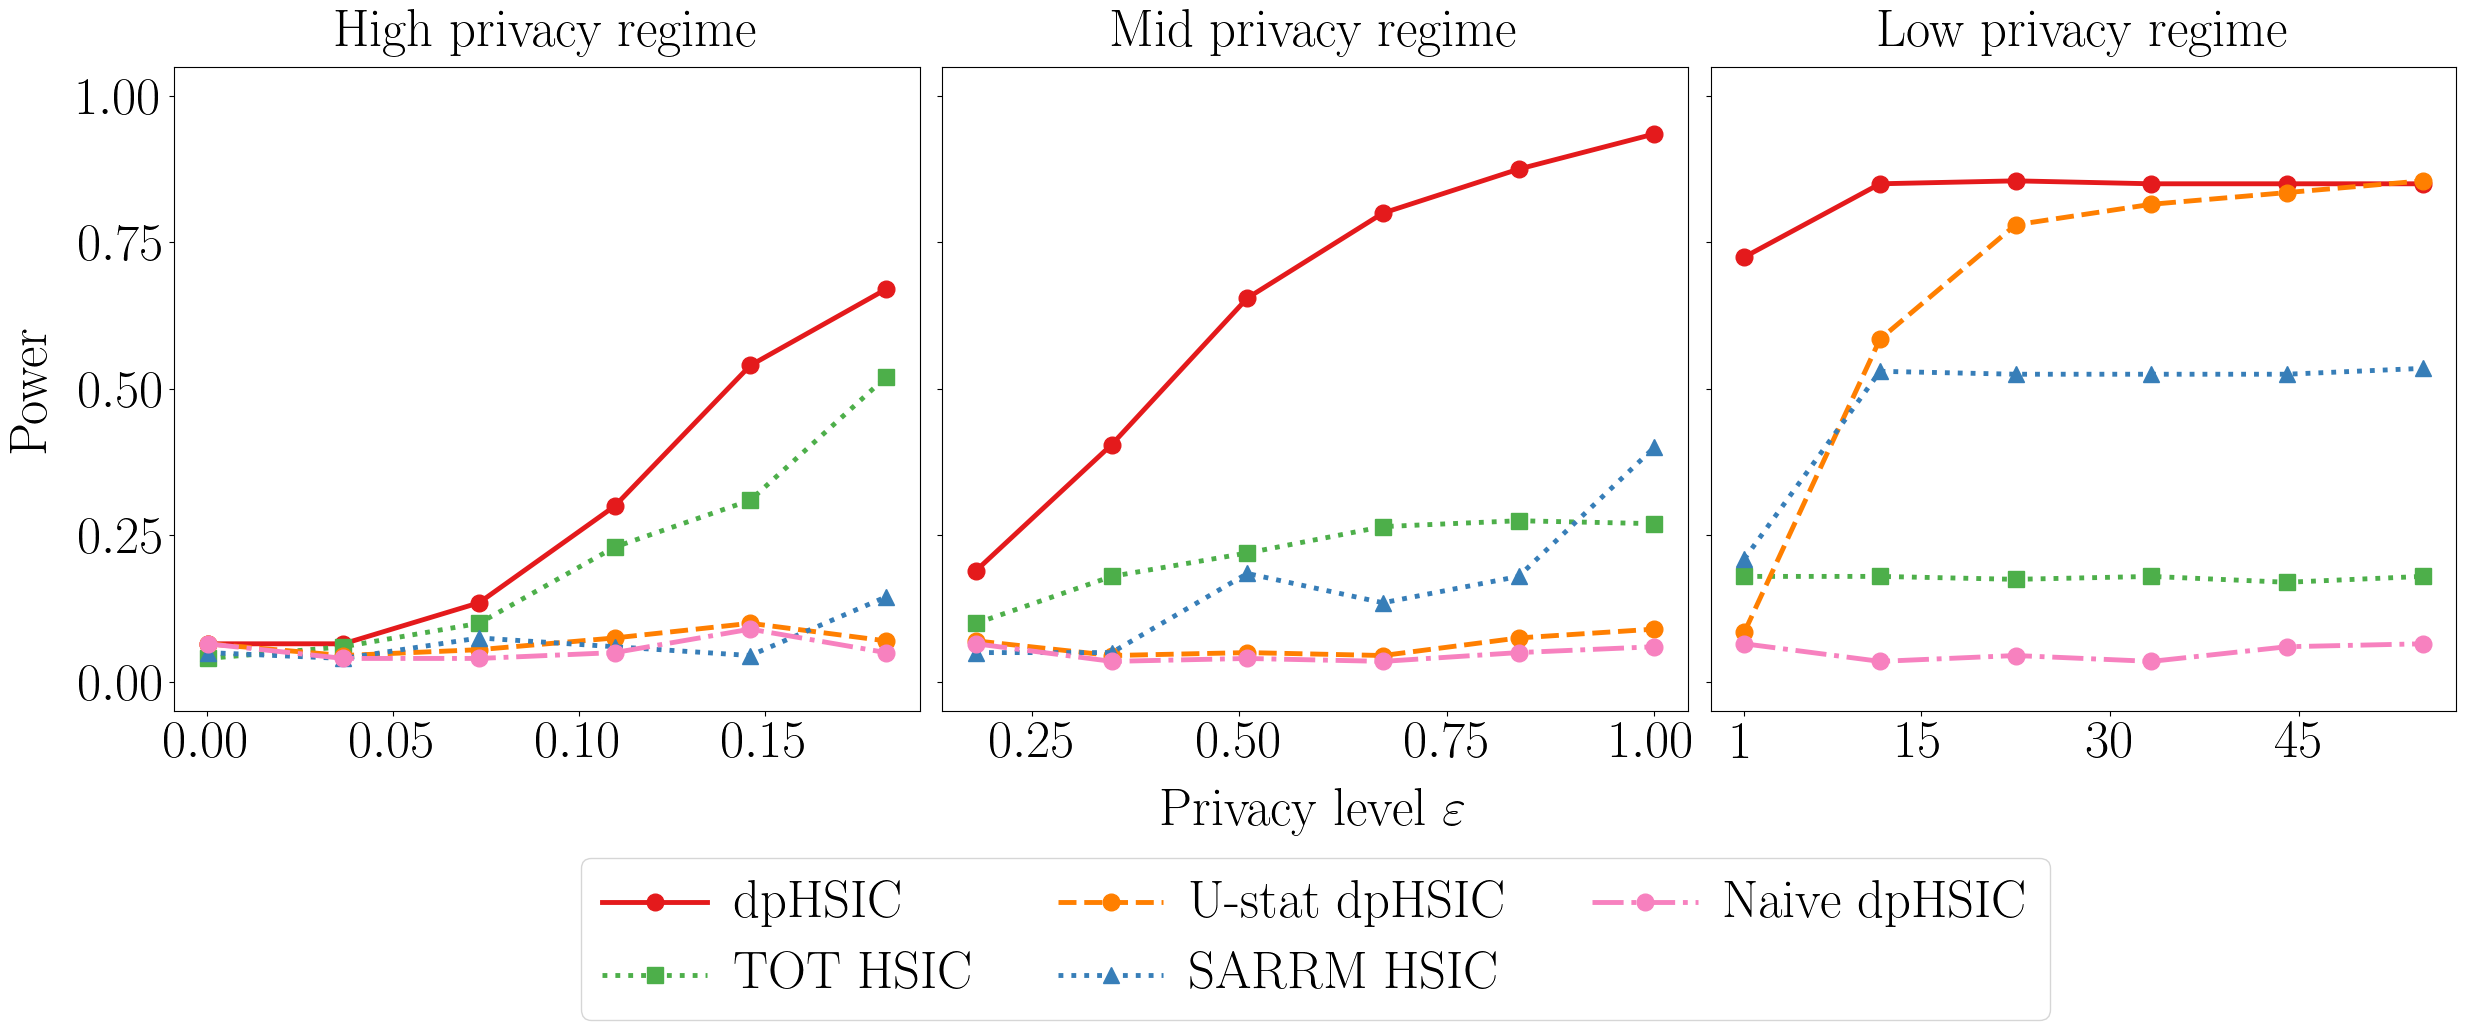

In [9]:
# load results
power_1 = np.load("results/uniform_hsic_power_vary_privacy_high.npy")
x_axis_1 = np.load("results/uniform_hsic_power_vary_privacy_high_x_axis.npy")

power_2 = np.load("results/uniform_hsic_power_vary_privacy_mid.npy")
x_axis_2 = np.load("results/uniform_hsic_power_vary_privacy_mid_x_axis.npy")

power_3 = np.load("results/uniform_hsic_power_vary_privacy_low.npy")
x_axis_3 = np.load("results/uniform_hsic_power_vary_privacy_low_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Power"
xlabels = (
    " ",
    r"Privacy level $\varepsilon$",
    "",
)

titles = (
    "High privacy regime",
    "Mid privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    # axs[i].set_xticks(x_axis[i])
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_xticks([0, 0.05, 0.1, 0.15])
axs[2].set_xticks([1, 15, 30, 45])
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_hsic_privacy.pdf", dpi=300, bbox_inches="tight")

## Vary sample size

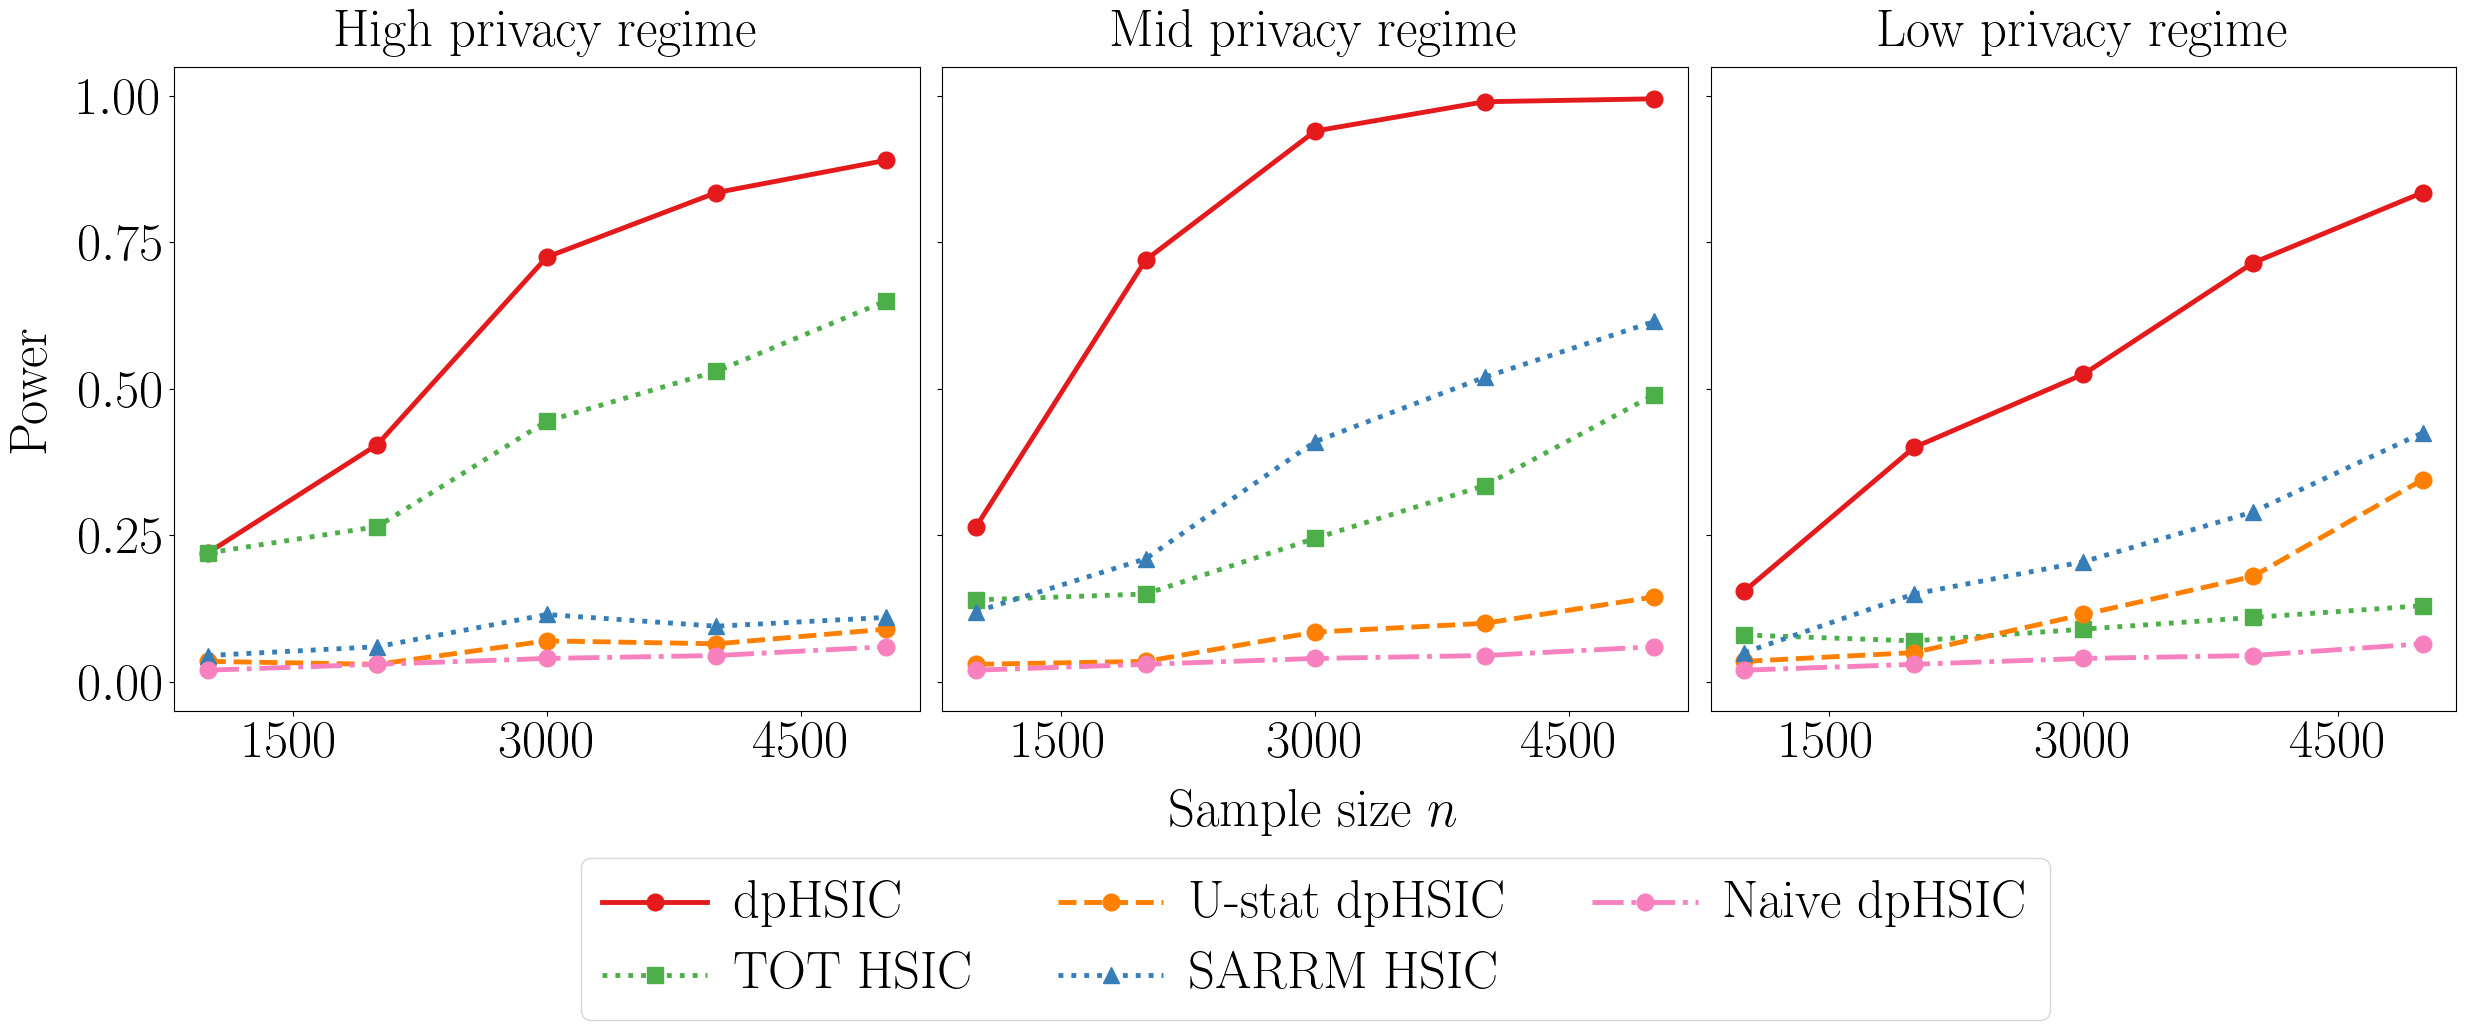

In [10]:
# load results
power_1 = np.load("results/uniform_hsic_power_vary_n_high.npy")
x_axis_1 = np.load("results/uniform_hsic_power_vary_n_high_x_axis.npy")

power_2 = np.load("results/uniform_hsic_power_vary_n_mid.npy")
x_axis_2 = np.load("results/uniform_hsic_power_vary_n_mid_x_axis.npy")

power_3 = np.load("results/uniform_hsic_power_vary_n_low.npy")
x_axis_3 = np.load("results/uniform_hsic_power_vary_n_low_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Power"
xlabels = (
    " ",
    r"Sample size $n$",
    "",
)

titles = (
    "High privacy regime",
    "Mid privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_xticks([1500, 3000, 4500])
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_hsic_sample_size.pdf", dpi=300, bbox_inches="tight")

## Vary dimension

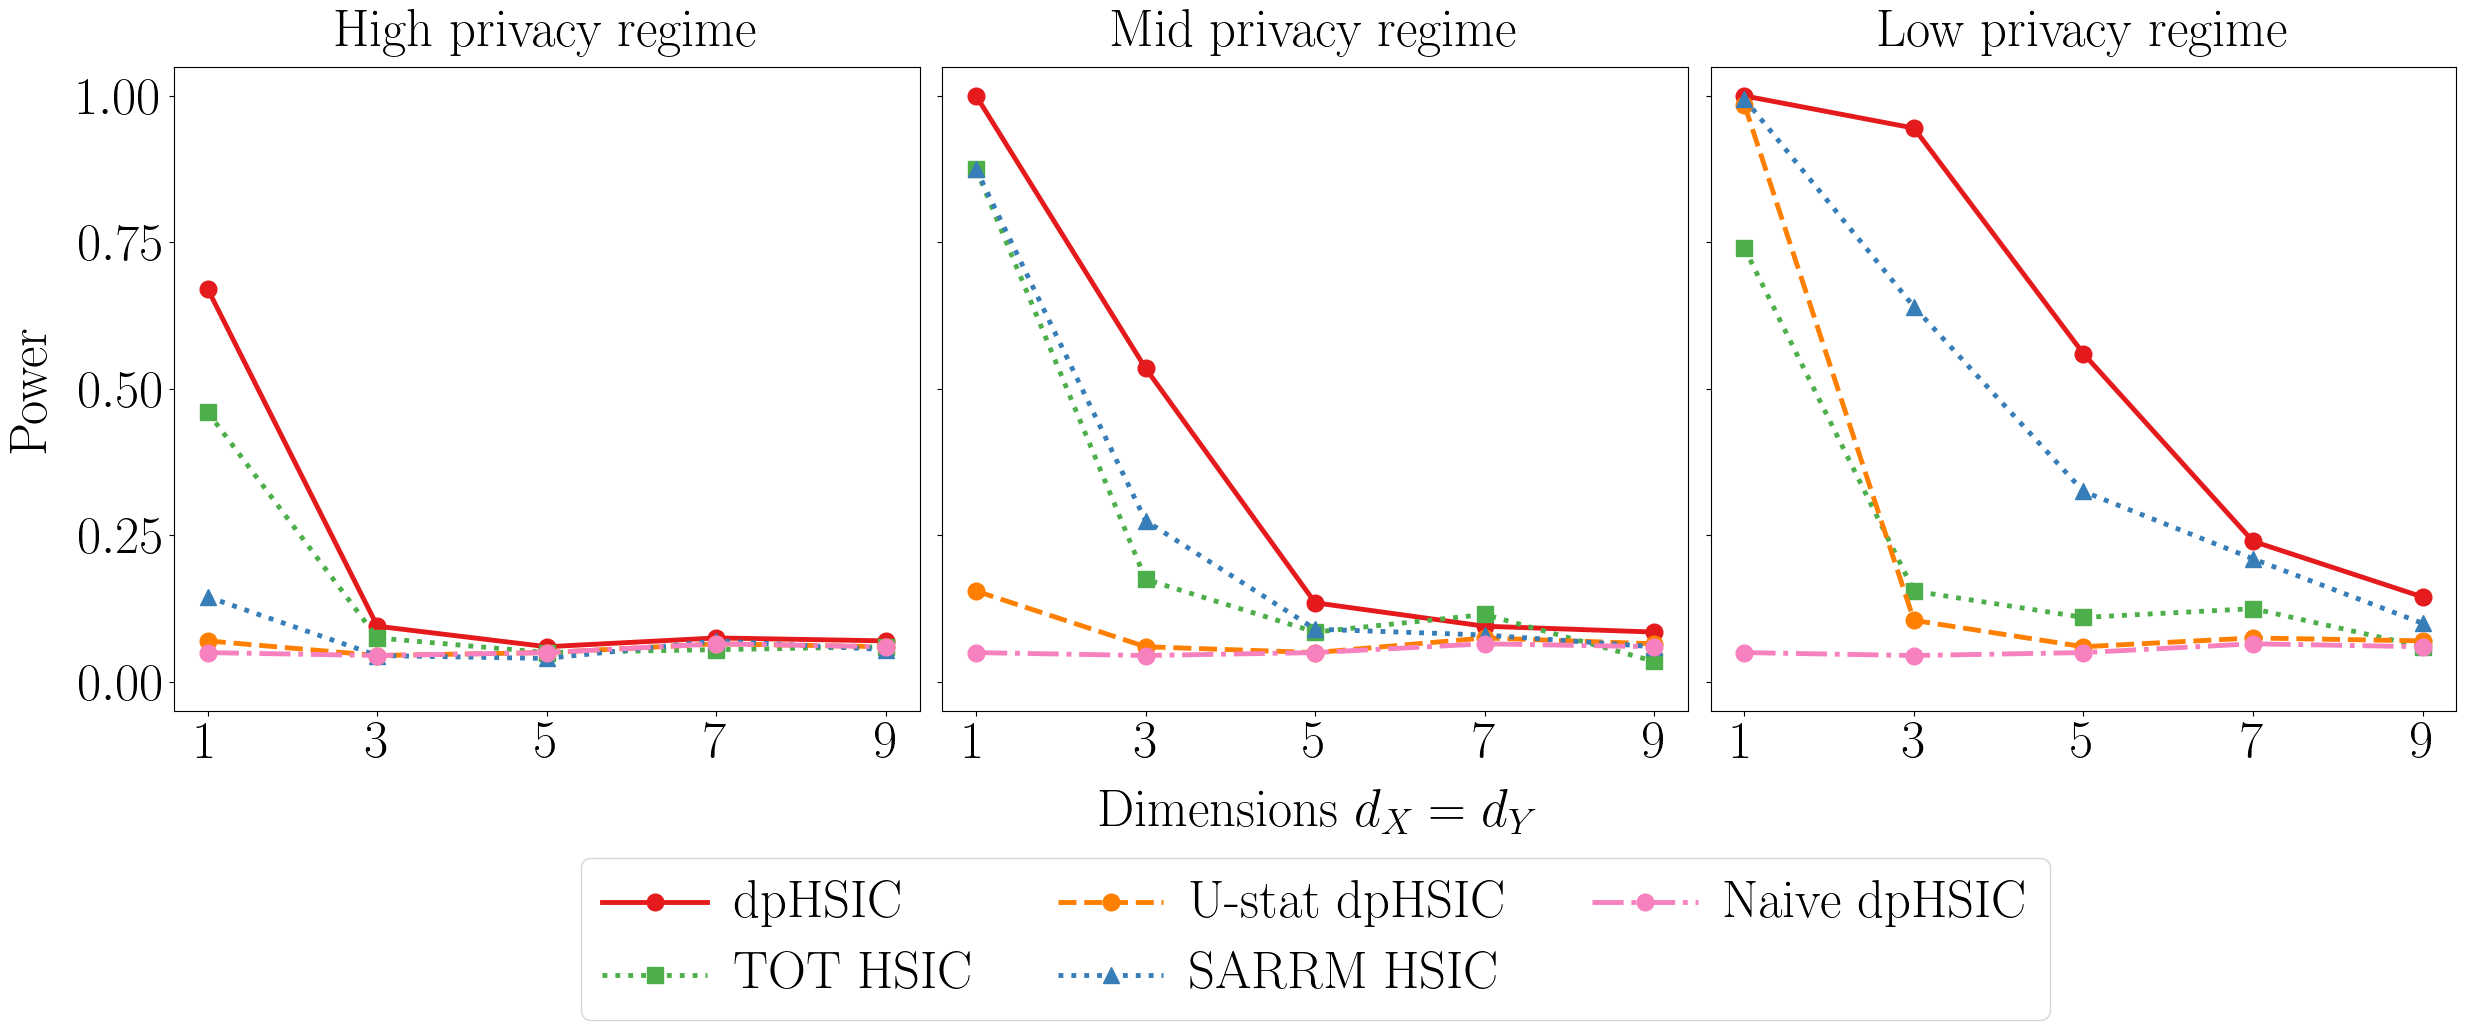

In [11]:
# load results
power_1 = np.load("results/uniform_hsic_power_vary_d_high.npy")
x_axis_1 = np.load("results/uniform_hsic_power_vary_d_high_x_axis.npy")

power_2 = np.load("results/uniform_hsic_power_vary_d_mid.npy")
x_axis_2 = np.load("results/uniform_hsic_power_vary_d_mid_x_axis.npy")

power_3 = np.load("results/uniform_hsic_power_vary_d_low.npy")
x_axis_3 = np.load("results/uniform_hsic_power_vary_d_low_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Power"
xlabels = (
    " ",
    r"Dimensions $d_X=d_Y$",
    "",
)

titles = (
    "High privacy regime",
    "Mid privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_xticks(x_axis[i])
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_hsic_dimension.pdf", dpi=300, bbox_inches="tight")

## Level

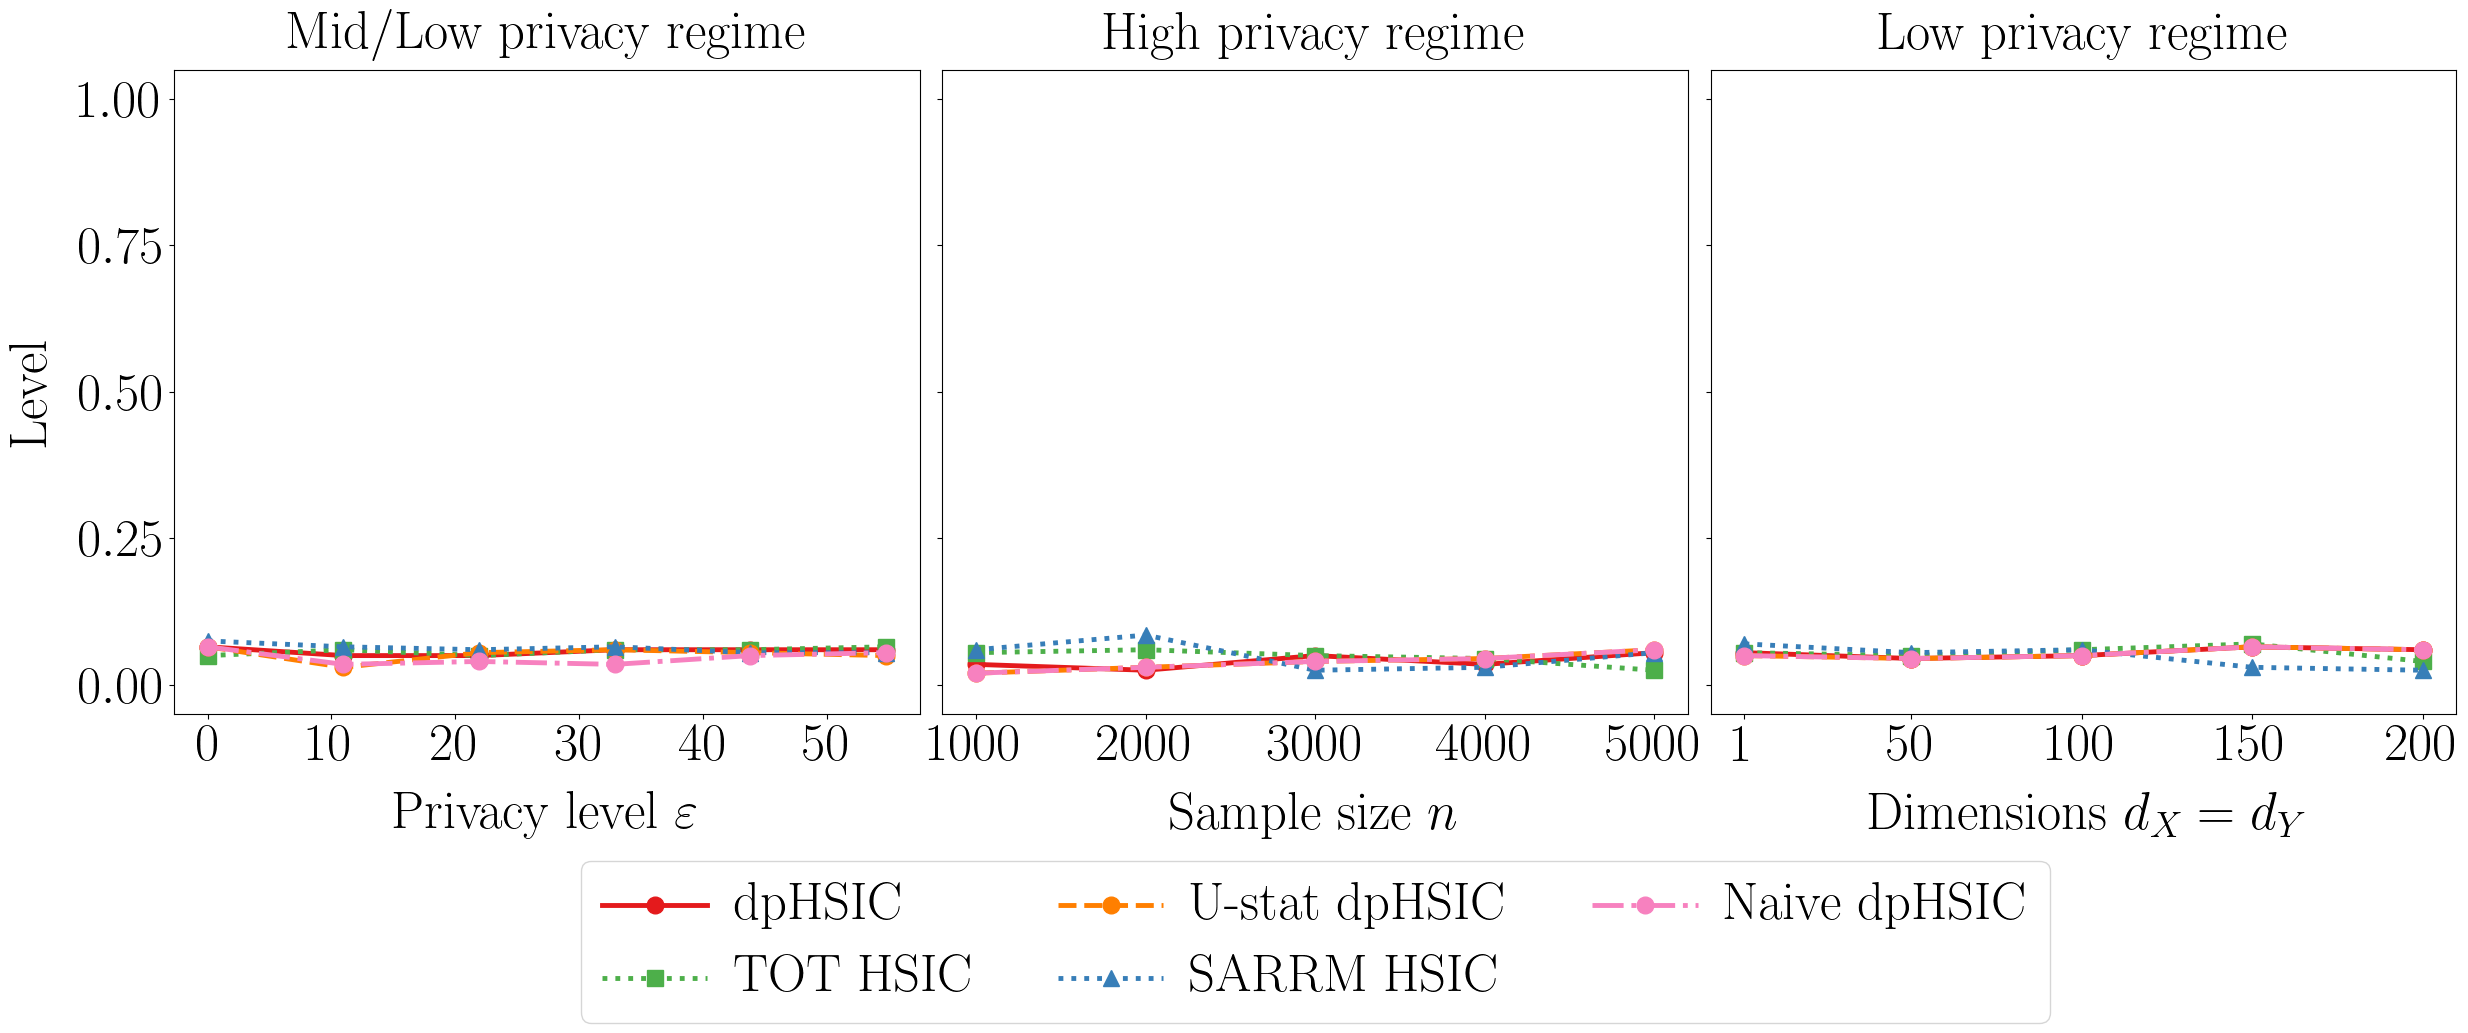

In [12]:
# load results
power_1 = np.load("results/uniform_hsic_level_vary_privacy.npy")
x_axis_1 = np.load("results/uniform_hsic_level_vary_privacy_x_axis.npy")

power_2 = np.load("results/uniform_hsic_level_vary_n.npy")
x_axis_2 = np.load("results/uniform_hsic_level_vary_n_x_axis.npy")

power_3 = np.load("results/uniform_hsic_level_vary_d.npy")
x_axis_3 = np.load("results/uniform_hsic_level_vary_d_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Level"
xlabels = (
    r"Privacy level $\varepsilon$",
    r"Sample size $n$",
    r"Dimensions $d_X=d_Y$",
)

titles = (
    "Mid/Low privacy regime ",
    "High privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_xticks([0, 10, 20, 30, 40, 50])
axs[1].set_xticks(x_axis[1])
axs[2].set_xticks(x_axis[2])
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_hsic_level.pdf", dpi=300, bbox_inches="tight")

## Appendix

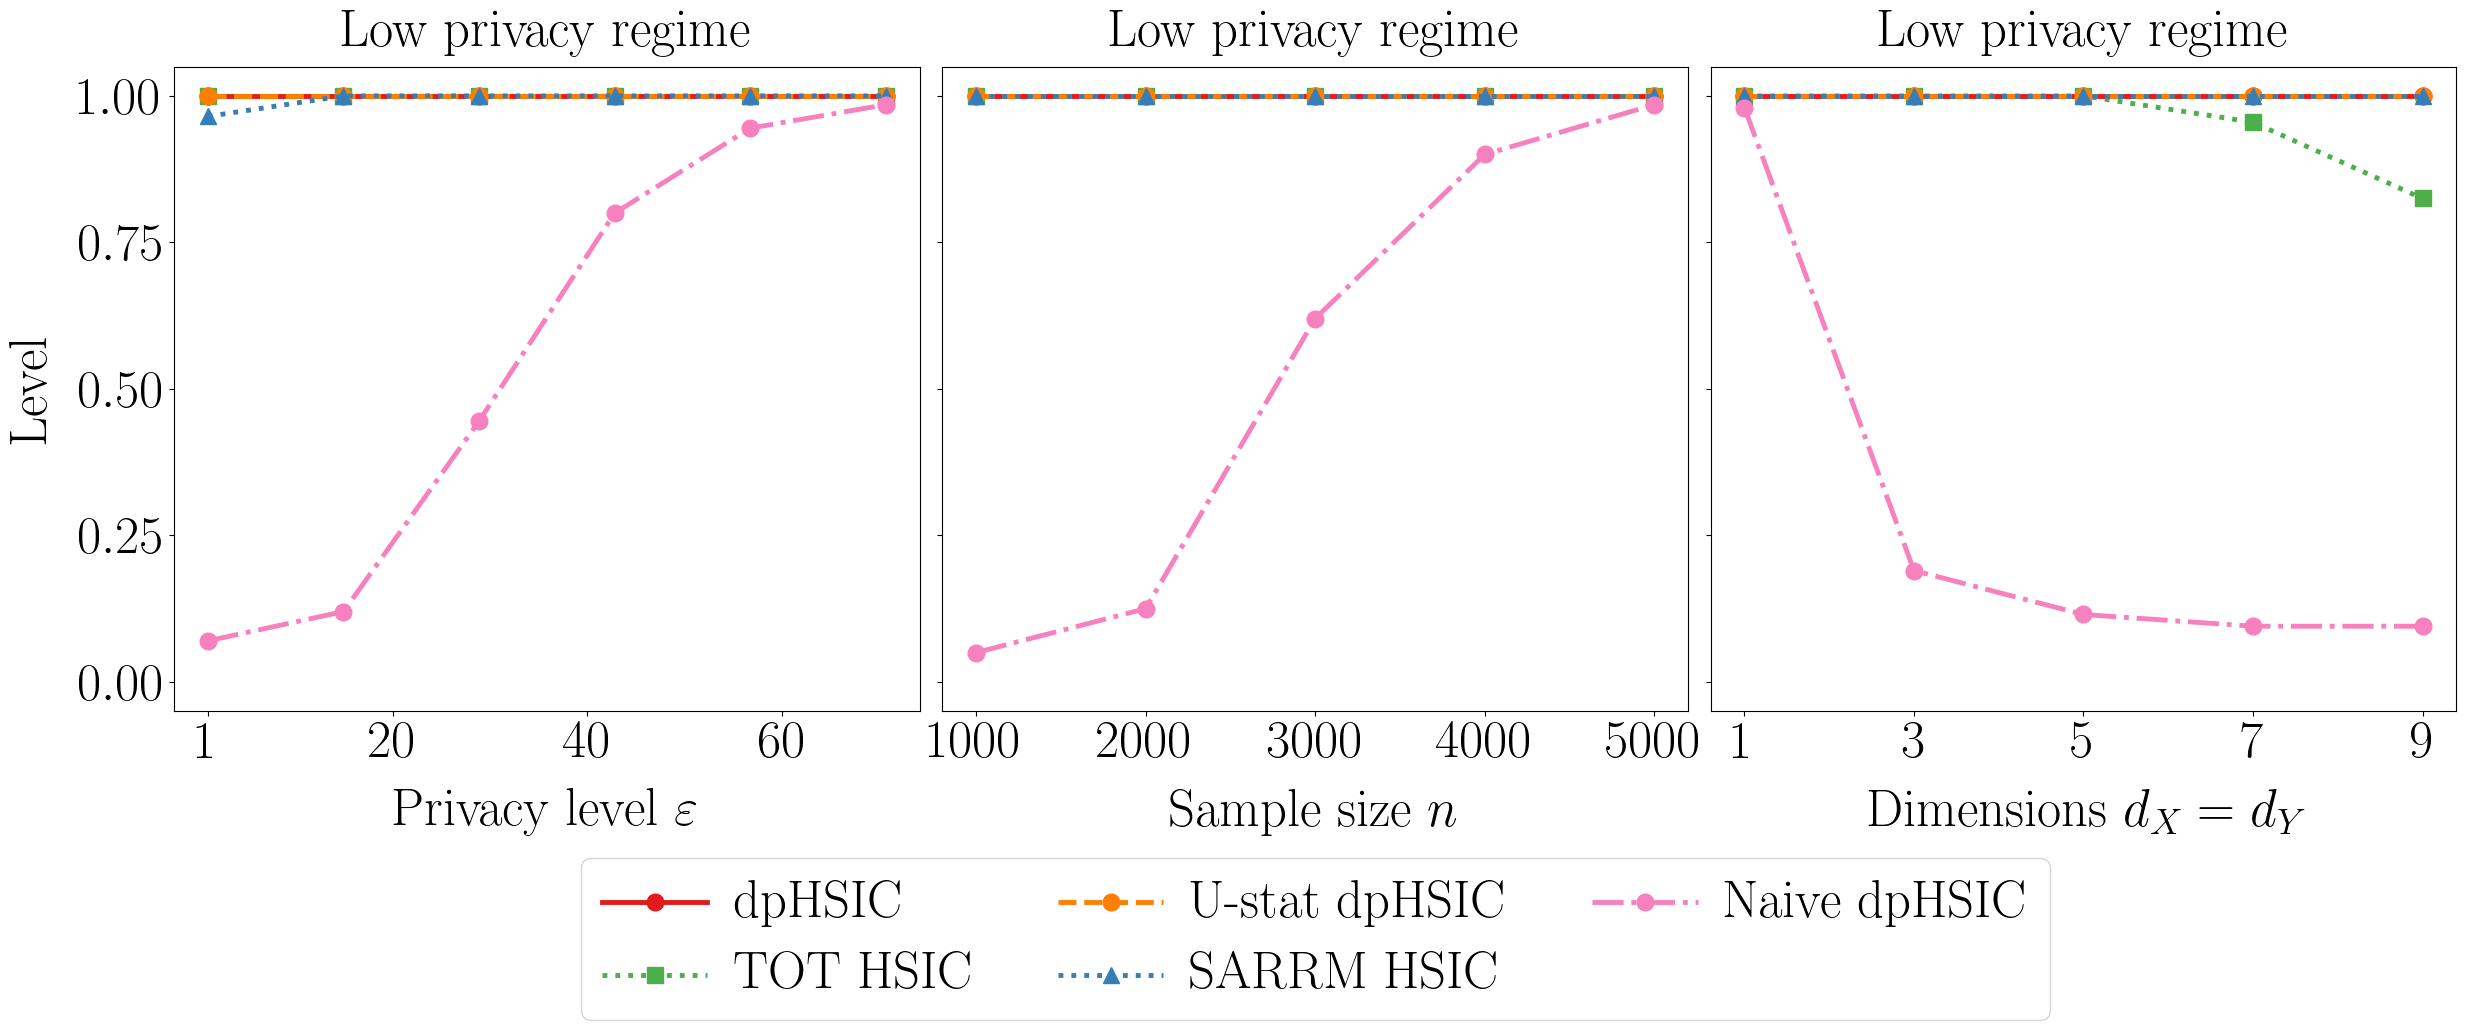

In [13]:
# load results
power_1 = np.load("results/uniform_hsic_power_vary_privacy_appendix.npy")
x_axis_1 = np.load("results/uniform_hsic_power_vary_privacy_appendix_x_axis.npy")

power_2 = np.load("results/uniform_hsic_power_vary_n_appendix.npy")
x_axis_2 = np.load("results/uniform_hsic_power_vary_n_appendix_x_axis.npy")

power_3 = np.load("results/uniform_hsic_power_vary_d_appendix.npy")
x_axis_3 = np.load("results/uniform_hsic_power_vary_d_appendix_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Level"
xlabels = (
    r"Privacy level $\varepsilon$",
    r"Sample size $n$",
    r"Dimensions $d_X=d_Y$",
)

titles = (
    "Low privacy regime",
    "Low privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_xticks([1, 20, 40, 60])
axs[1].set_xticks(x_axis[1])
axs[2].set_xticks(x_axis[2])
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/uniform_hsic_appendix.pdf", dpi=300, bbox_inches="tight")

# CelebA

In [14]:
# Parameters for plots
linewidth = 3.5
markersize = 12
ylabel_fontsize = 38
xlabel_fontsize = 38
title_fontsize = 38
legend_fontsize = 38
title_pad = 15
xlabel_pad = 15
ylabel_pad = 15

labels = (
    r"\textrm{dpMMD}",
    r"\textrm{Naive dpMMD}",
    r"\textrm{U-stat dpMMD}",
    r"\textrm{TOT MMD}",
    r"\textrm{SARRM MMD}",
)

# https://gist.github.com/thriveth/8560036
colors = [
    "#e41a1c", # red
    "#f781bf", # pink
    "#ff7f00", # orange
    "#4daf4a", # green
    "#377eb8", # blue
    "#984ea3", # purple
    "#a65628", # brown
    "#999999", # grey
    "#dede00", # yellow
]

markers = [
    'o',
    'o',
    'o',
    's',
    '^',
    'd',
]

linestyles = [
    '-',
    '-.',
    '--',
    ':',
    ':',
    ':',
]

## Vary privacy

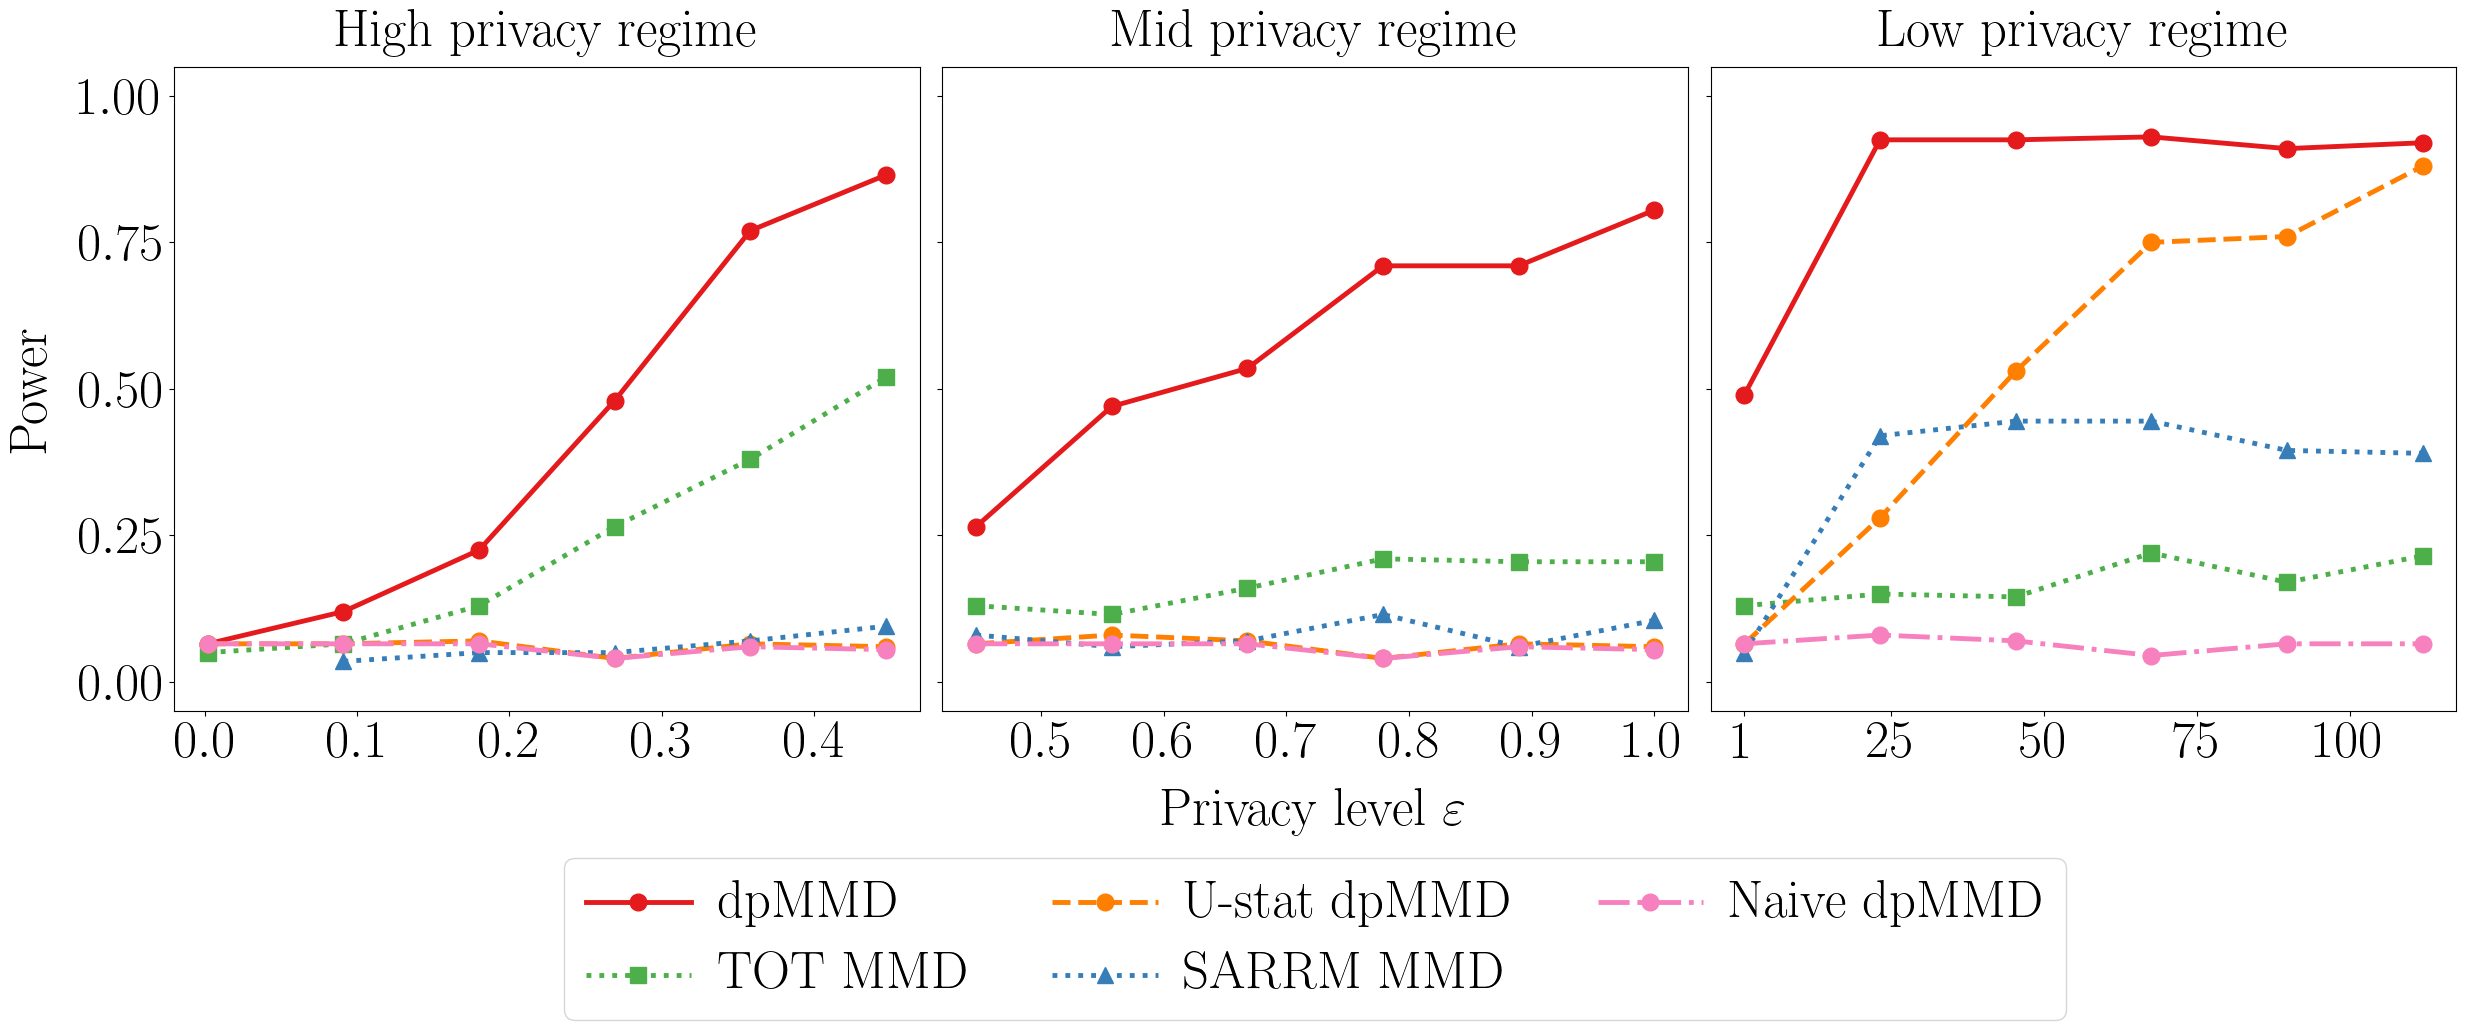

In [15]:
# load results
power_1 = np.load("results/celeba_mmd_power_vary_privacy_high.npy")
x_axis_1 = np.load("results/celeba_mmd_power_vary_privacy_high_x_axis.npy")

power_2 = np.load("results/celeba_mmd_power_vary_privacy_mid.npy")
x_axis_2 = np.load("results/celeba_mmd_power_vary_privacy_mid_x_axis.npy")

power_3 = np.load("results/celeba_mmd_power_vary_privacy_low.npy")
x_axis_3 = np.load("results/celeba_mmd_power_vary_privacy_low_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Power"
xlabels = (
    " ",
    r"Privacy level $\varepsilon$",
    "",
)

titles = (
    "High privacy regime",
    "Mid privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    # axs[i].set_xticks(x_axis[i])
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_xticks([0, 0.1, 0.2, 0.3, 0.4])
axs[1].set_xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
axs[2].set_xticks([1, 25, 50, 75, 100])
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/celeba_mmd_privacy.pdf", dpi=300, bbox_inches="tight")

## Vary sample size

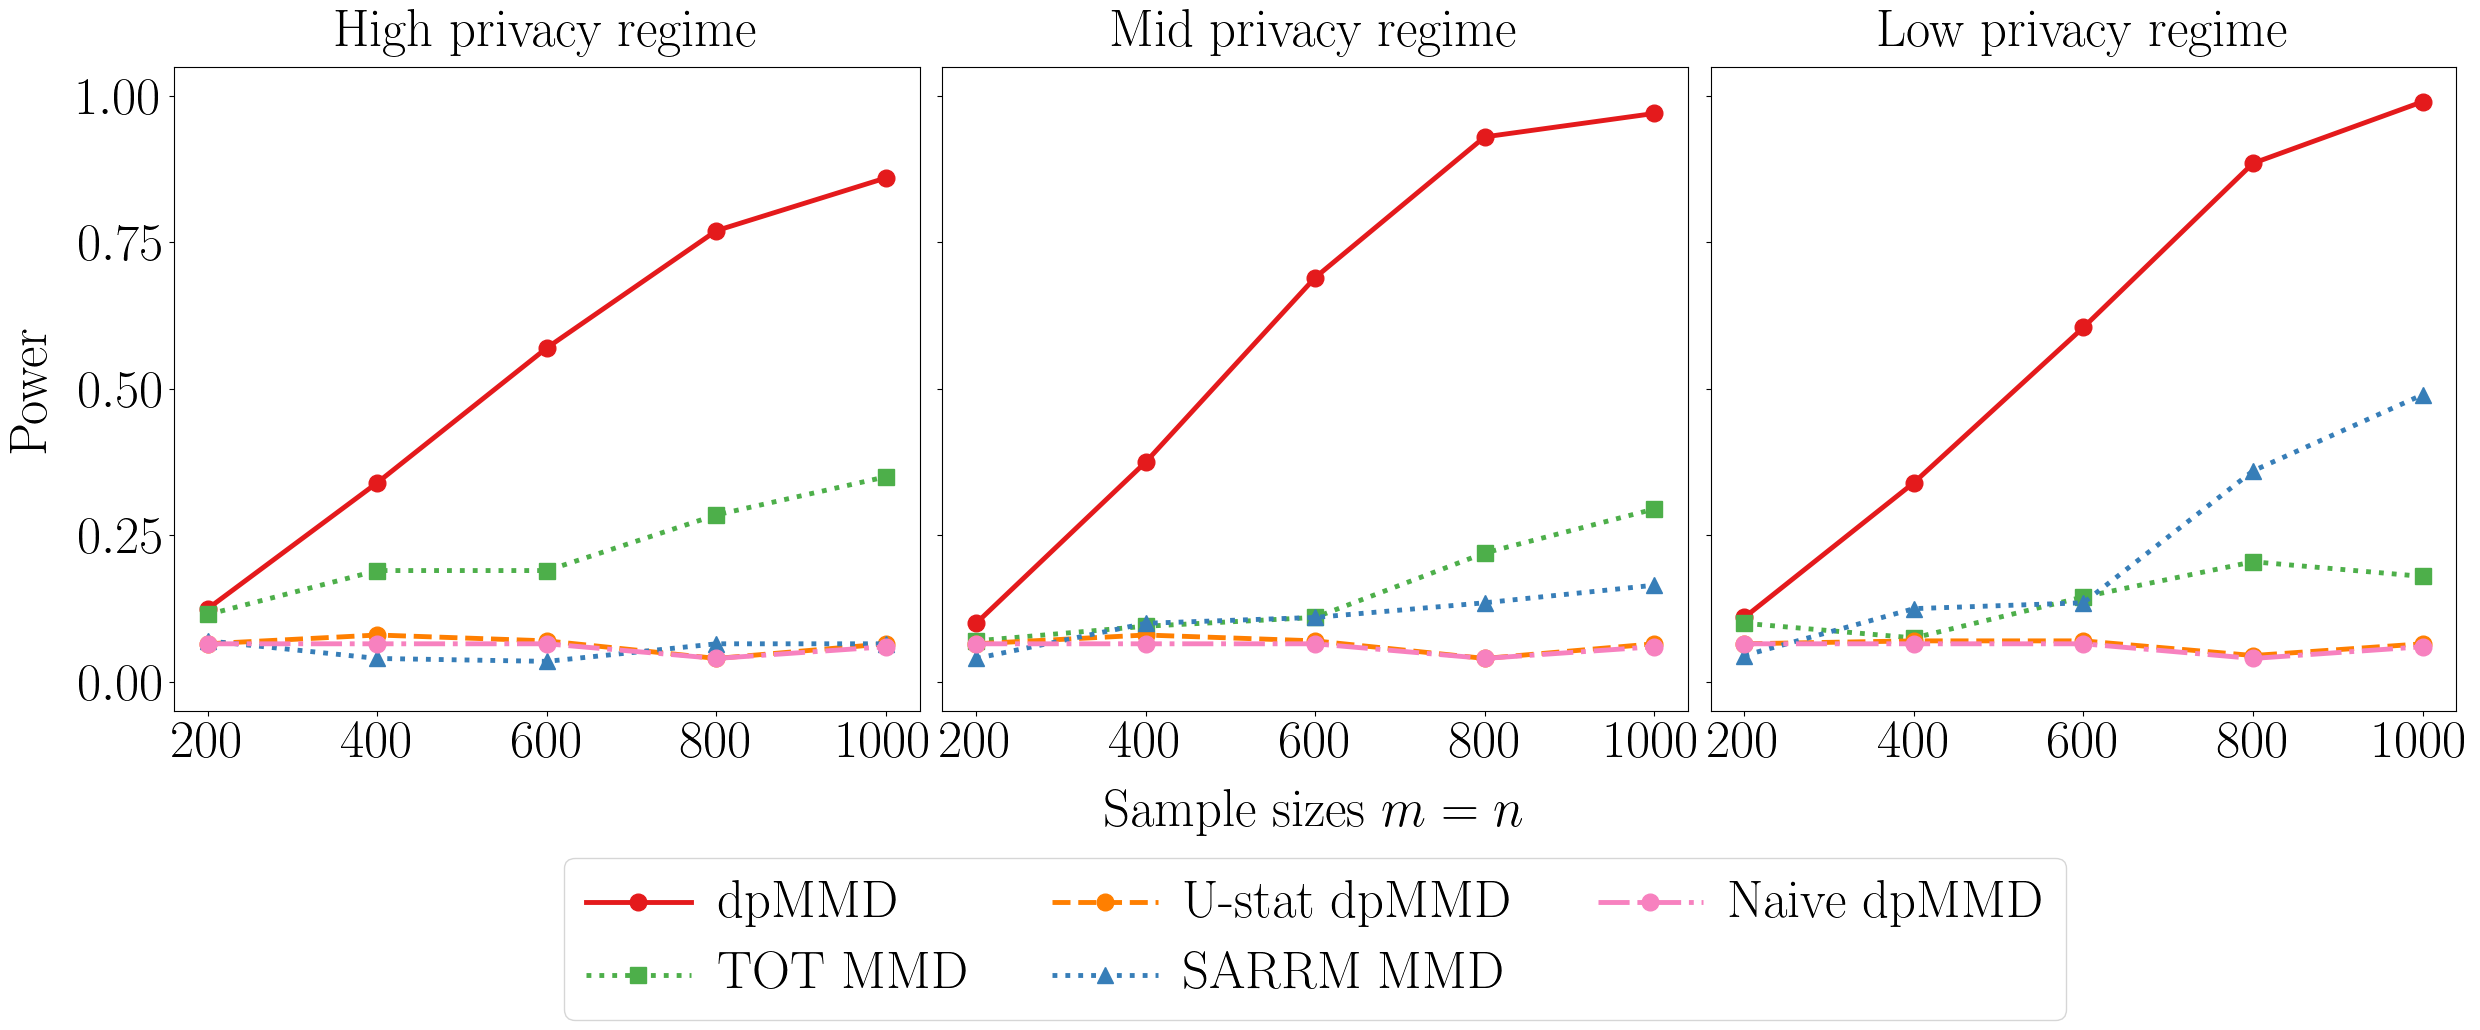

In [16]:
# load results
power_1 = np.load("results/celeba_mmd_power_vary_n_high.npy")
x_axis_1 = np.load("results/celeba_mmd_power_vary_n_high_x_axis.npy")

power_2 = np.load("results/celeba_mmd_power_vary_n_mid.npy")
x_axis_2 = np.load("results/celeba_mmd_power_vary_n_mid_x_axis.npy")

power_3 = np.load("results/celeba_mmd_power_vary_n_low.npy")
x_axis_3 = np.load("results/celeba_mmd_power_vary_n_low_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Power"
xlabels = (
    " ",
    r"Sample sizes $m=n$",
    "",
)

titles = (
    "High privacy regime",
    "Mid privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_xticks(x_axis[i])
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/celeba_mmd_sample_size.pdf", dpi=300, bbox_inches="tight")

## Vary corruption

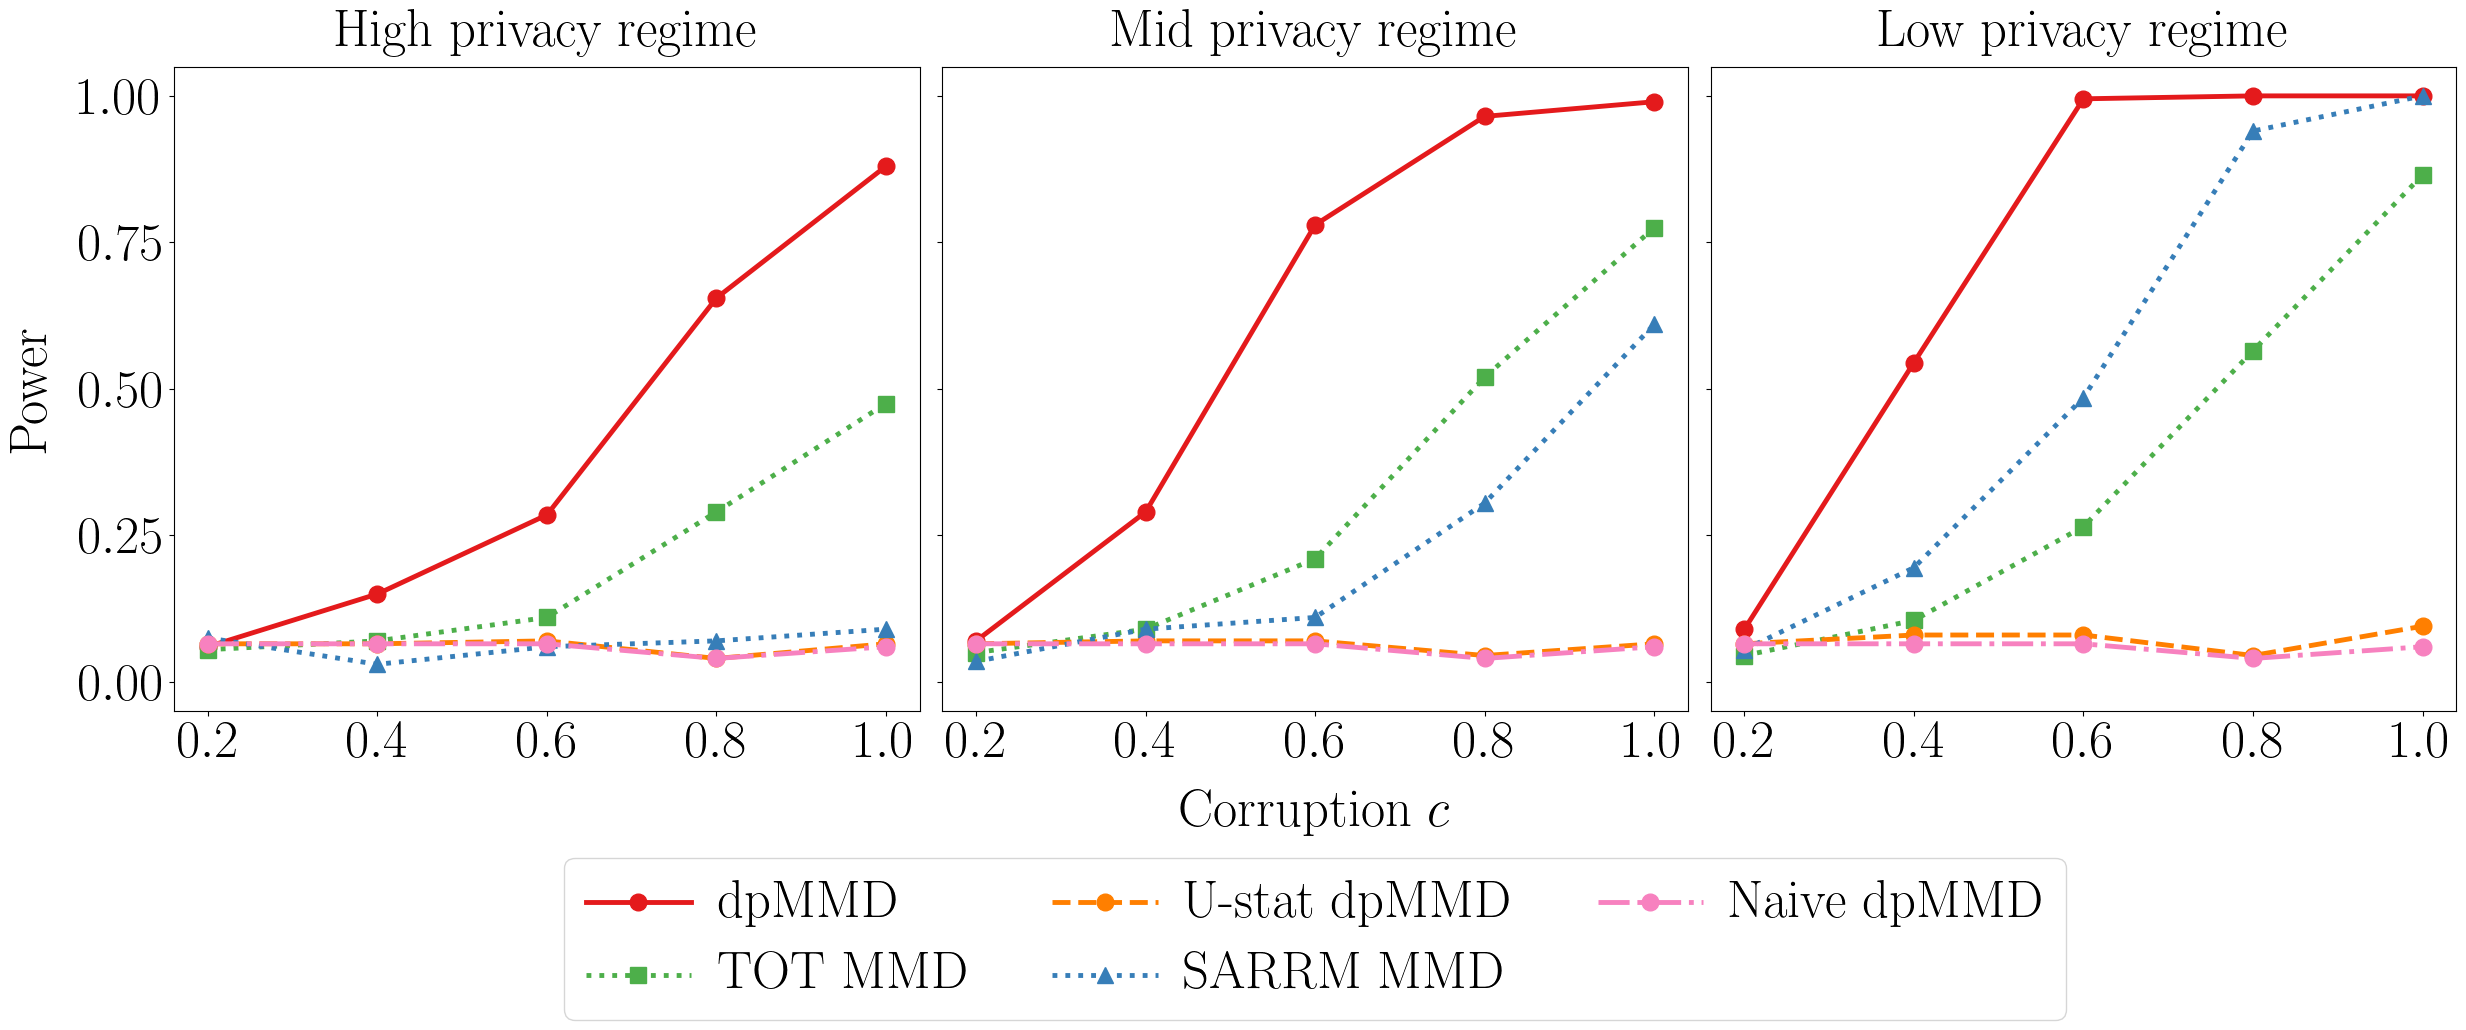

In [17]:
# load results
power_1 = np.load("results/celeba_mmd_power_vary_c_high.npy")
x_axis_1 = np.load("results/celeba_mmd_power_vary_c_high_x_axis.npy")

power_2 = np.load("results/celeba_mmd_power_vary_c_mid.npy")
x_axis_2 = np.load("results/celeba_mmd_power_vary_c_mid_x_axis.npy")

power_3 = np.load("results/celeba_mmd_power_vary_c_low.npy")
x_axis_3 = np.load("results/celeba_mmd_power_vary_c_low_x_axis.npy")

power = (power_1, power_2, power_3)
x_axis = (x_axis_1, x_axis_2, x_axis_3)

ylabel = "Power"
xlabels = (
    " ",
    r"Corruption $c$",
    "",
)

titles = (
    "High privacy regime",
    "Mid privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(3):
    for j in (0, 3, 2, 4, 1):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_xticks(x_axis[i])
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.52),
)

f.savefig("figures/celeba_mmd_corruption.pdf", dpi=300, bbox_inches="tight")

## Level

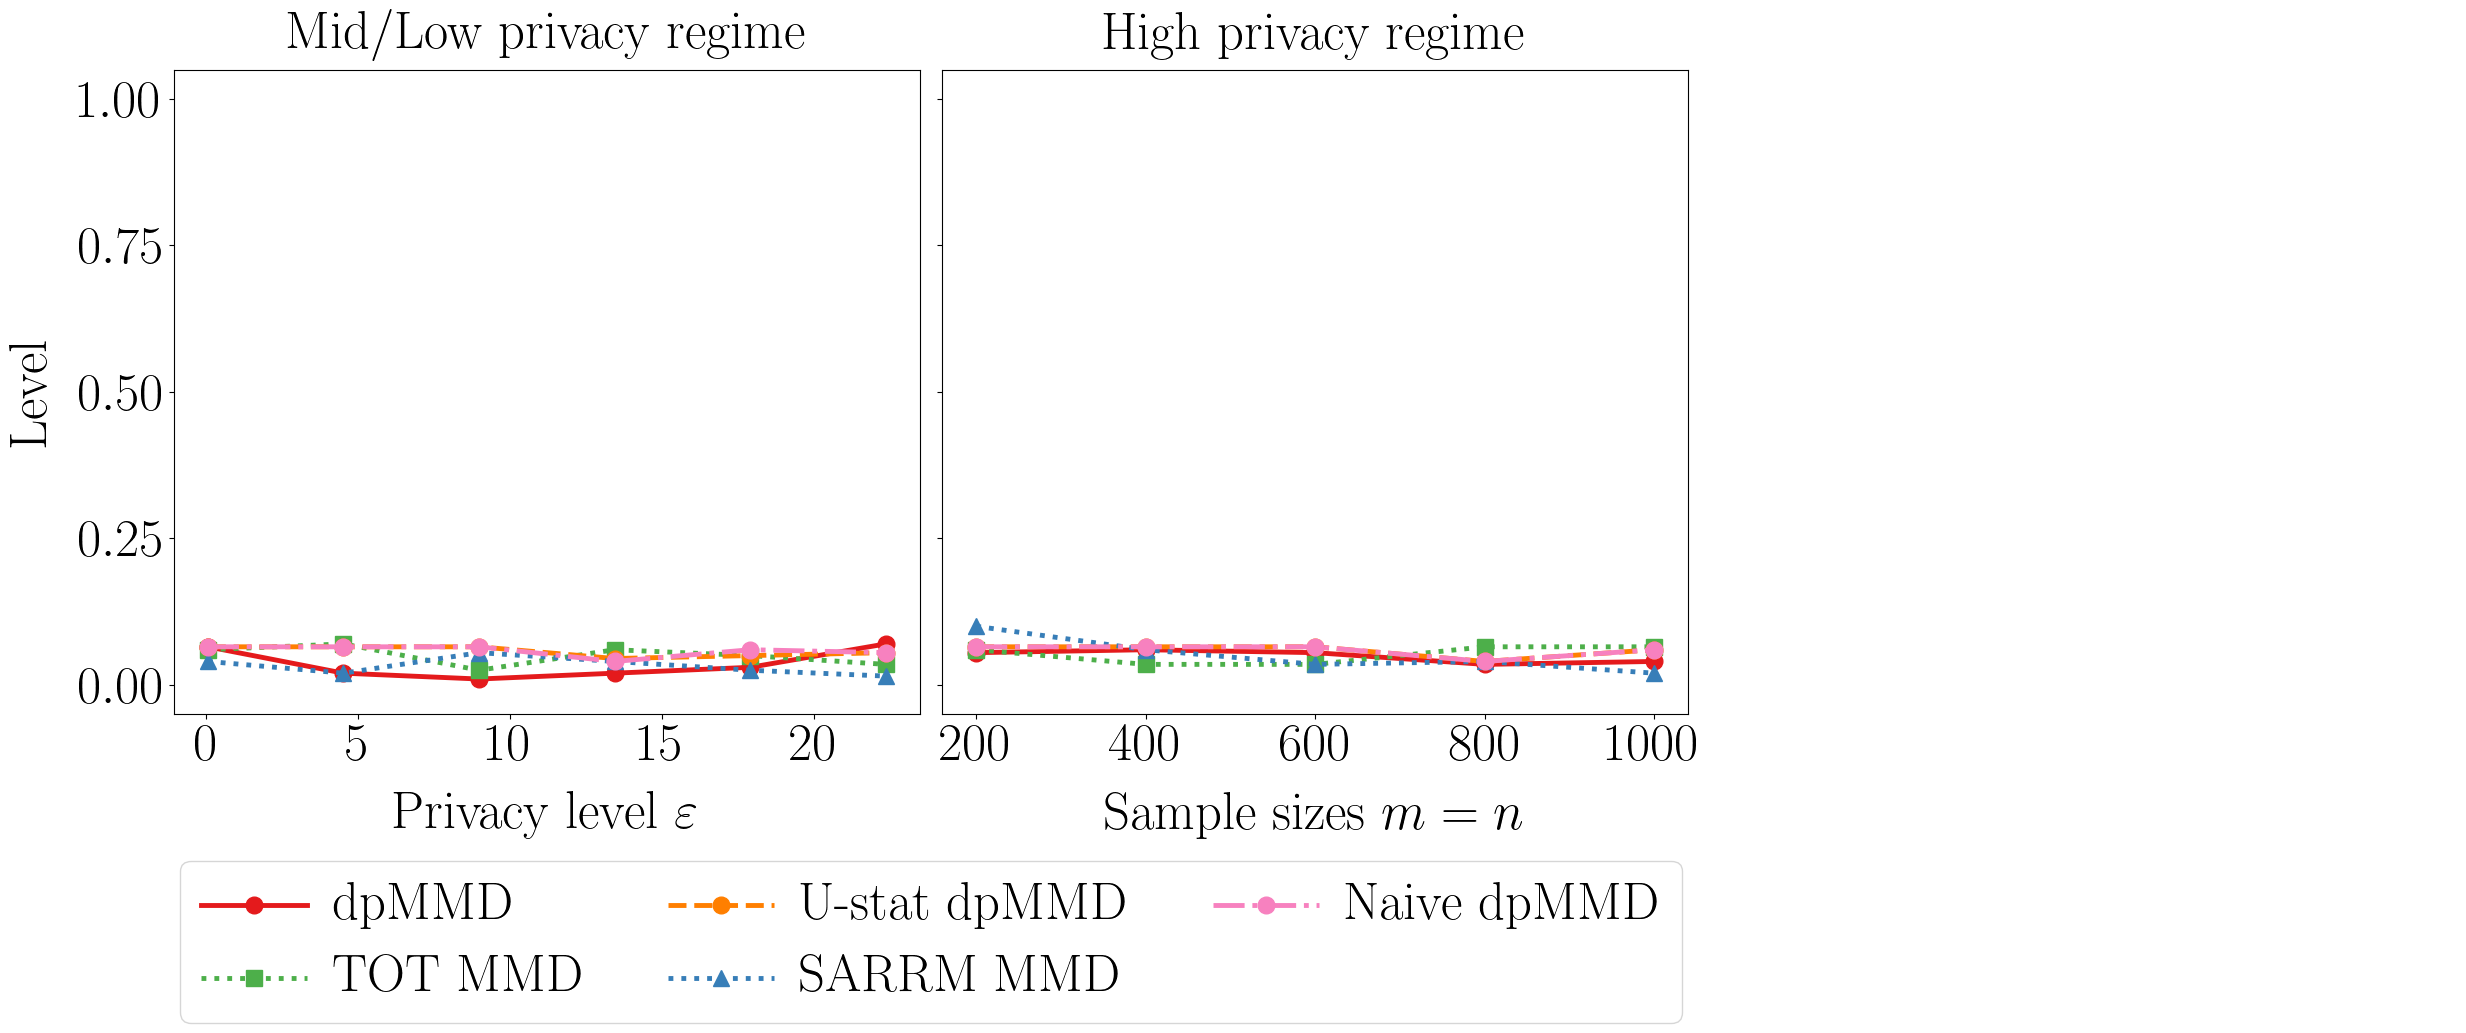

In [18]:
# load results
power_1 = np.load("results/celeba_mmd_level_vary_privacy.npy")
x_axis_1 = np.load("results/celeba_mmd_level_vary_privacy_x_axis.npy")

power_2 = np.load("results/celeba_mmd_level_vary_n.npy")
x_axis_2 = np.load("results/celeba_mmd_level_vary_n_x_axis.npy")

power = (power_1, power_2)
x_axis = (x_axis_1, x_axis_2)

ylabel = "Level"
xlabels = (
    r"Privacy level $\varepsilon$",
    r"Sample sizes $m=n$",
)

titles = (
    "Mid/Low privacy regime ",
    "High privacy regime",
    "Low privacy regime",
)

# create figure
width = 25
height = width / 3
f, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
for i in range(2):
    for j in (0, 3, 2, 4, 1):
        axs[i].plot(
                x_axis[i][power[i][j] >= 0],
                power[i][j][power[i][j] >= 0],
                label=labels[j],
                color=colors[j],
                marker=markers[j],
                linestyle=linestyles[j],
                linewidth=linewidth,
                markersize=markersize,
            )
    axs[i].set_title(titles[i], fontsize=title_fontsize, pad=title_pad)
    axs[i].set_xlabel(xlabels[i], fontsize=xlabel_fontsize, labelpad=xlabel_pad)
axs[0].set_xticks([0, 5, 10, 15, 20])
axs[1].set_xticks(x_axis[1])
axs[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axs[0].set_ylim(-0.05, 1.05)
axs[0].set_ylabel(ylabel, fontsize=ylabel_fontsize, labelpad=ylabel_pad)
axs[2].axis('off')
axs[1].legend(
    fontsize=legend_fontsize,
    ncol=3,
    handleheight=0.1,
    labelspacing=0.5,
    columnspacing=1.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(-0.015, -0.52),
)

f.savefig("figures/celeba_mmd_level.pdf", dpi=300, bbox_inches="tight")